In [1]:
from datetime import datetime

from astropy.io import fits,ascii
from astropy.table import Table,QTable
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import CenteredNorm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from photutils.aperture import EllipticalAperture
from photutils.isophote import build_ellipse_model,Ellipse,EllipseGeometry

import warnings
warnings.filterwarnings("ignore")

In [2]:
time_ini = datetime.now()

In [3]:
#imported data directories:
data_dir=f'results/morphology/'
cuts_dir_F090W=f'results/make_postage_stamps/F090W/'
cuts_dir_F115W=f'results/make_postage_stamps/F115W/'
cuts_dir_F150W=f'results/make_postage_stamps/F150W/'
cuts_dir_F200W=f'results/make_postage_stamps/F200W/'
cuts_dir_F277W=f'results/make_postage_stamps/F277W/'
cuts_dir_F356W=f'results/make_postage_stamps/F356W/'
cuts_dir_F444W=f'results/make_postage_stamps/F444W/'

#directoy to store results from this notebook:
res_dir=f'results/isophotal_analysis/'

Firstly, we read the table with the data from the 7 galaxies selected from visual classification.

In [4]:
table=data_dir+f'gal_visual_class_list_vsb.ecsv'
data_sample = ascii.read(table)

#list of galaxies ID:
gal_list=data_sample['ID']

# 1. Cutouts in all filters from all galaxies

Firstly, we represent each galaxy in all the available filters to discard any unwanted results.

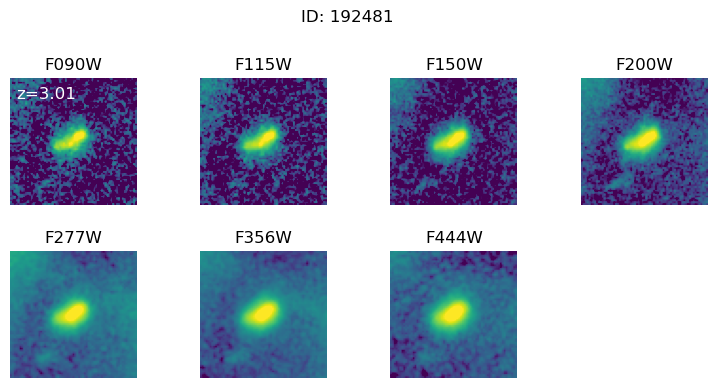

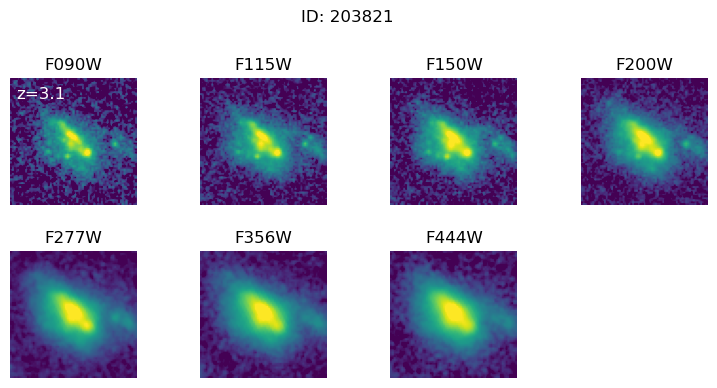

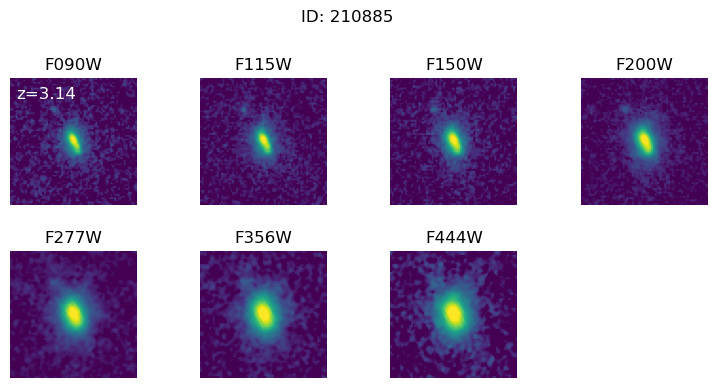

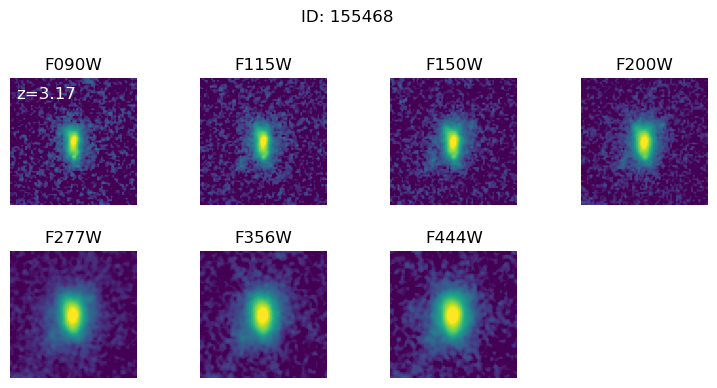

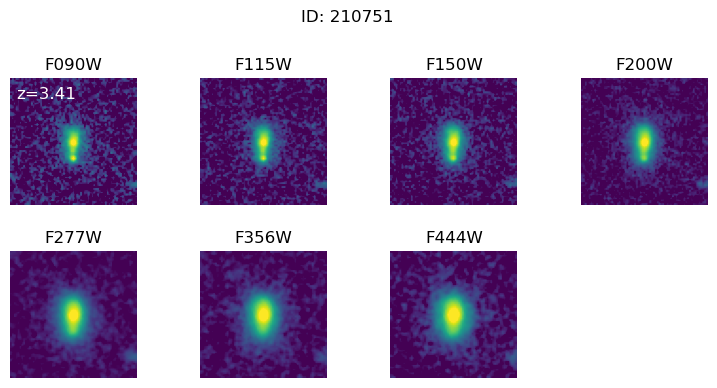

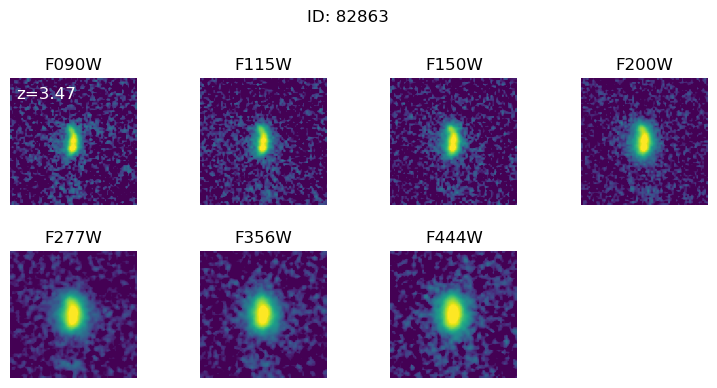

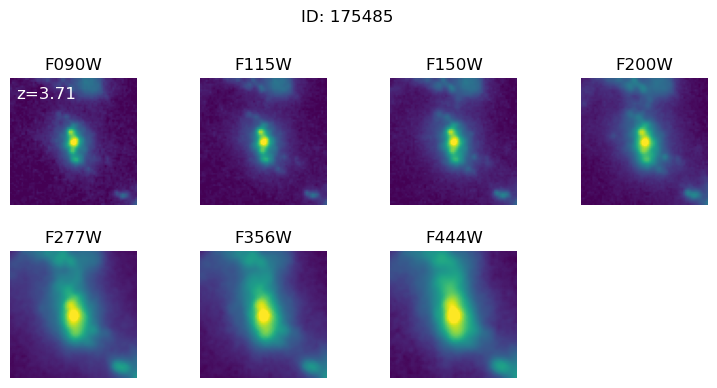

In [5]:
gal_list=data_sample['ID']
i=0

with PdfPages(res_dir+f'cutouts_all_filters.pdf') as pdf:
    for gal in gal_list:

        #galaxy in all filters:
        image_F090W=cuts_dir_F090W+f"{gal}_cutout.fits"
        image_F115W=cuts_dir_F115W+f"{gal}_cutout.fits"
        image_F150W=cuts_dir_F150W+f"{gal}_cutout.fits"
        image_F200W=cuts_dir_F200W+f"{gal}_cutout.fits"
        image_F277W=cuts_dir_F277W+f"{gal}_cutout.fits"
        image_F356W=cuts_dir_F356W+f"{gal}_cutout.fits"
        image_F444W=cuts_dir_F444W+f"{gal}_cutout.fits"
        
        hdu_image_F090W=fits.open(image_F090W)
        hdu_image_F115W=fits.open(image_F115W)
        hdu_image_F150W=fits.open(image_F150W)
        hdu_image_F200W=fits.open(image_F200W)
        hdu_image_F277W=fits.open(image_F277W)
        hdu_image_F356W=fits.open(image_F356W)
        hdu_image_F444W=fits.open(image_F444W)
        
        data_F090W=hdu_image_F090W[1].data
        data_F115W=hdu_image_F115W[1].data
        data_F150W=hdu_image_F150W[1].data
        data_F200W=hdu_image_F200W[1].data
        data_F277W=hdu_image_F277W[1].data
        data_F356W=hdu_image_F356W[1].data
        data_F444W=hdu_image_F444W[1].data
        
        #normalization of all images:
        img_max_F090W=0.6*np.max(data_F090W)
        img_max_F115W=0.6*np.max(data_F115W)
        img_max_F150W=0.6*np.max(data_F150W)
        img_max_F200W=0.6*np.max(data_F200W)
        img_max_F277W=0.6*np.max(data_F277W)
        img_max_F356W=0.6*np.max(data_F356W)
        img_max_F444W=0.6*np.max(data_F444W)
        
        norm_F090W = simple_norm(data_F090W, 'log', log_a=70, min_cut=0, max_cut=img_max_F090W)
        norm_F115W = simple_norm(data_F115W, 'log', log_a=70, min_cut=0, max_cut=img_max_F115W)
        norm_F150W = simple_norm(data_F150W, 'log', log_a=70, min_cut=0, max_cut=img_max_F150W)
        norm_F200W = simple_norm(data_F200W, 'log', log_a=70, min_cut=0, max_cut=img_max_F200W)
        norm_F277W = simple_norm(data_F277W, 'log', log_a=70, min_cut=0, max_cut=img_max_F277W)
        norm_F356W = simple_norm(data_F356W, 'log', log_a=70, min_cut=0, max_cut=img_max_F356W)
        norm_F444W = simple_norm(data_F444W, 'log', log_a=70, min_cut=0, max_cut=img_max_F444W)
        
        #plotting:
        fig=plt.figure(figsize=(9, 4.5))
        fig.suptitle(f'ID: {gal}')
        plt.subplots_adjust(hspace=0, wspace=0.5)
        
        plt.subplot(2, 4, 1)
        plt.imshow(data_F090W, origin='lower',norm=norm_F090W)
        plt.title("F090W")
        plt.axis('off')
        z=data_sample['z'][i]
        text_kwargs = dict(ha='left', va='top', fontsize=12, color='white')
        plt.text(3, 62, f'z={z}', **text_kwargs)
        
        plt.subplot(2, 4, 2)
        plt.imshow(data_F115W, origin='lower',norm=norm_F115W)
        plt.title("F115W")
        plt.axis('off')
        
        plt.subplot(2, 4, 3)
        plt.imshow(data_F150W, origin='lower',norm=norm_F150W)
        plt.title("F150W")
        plt.axis('off')

        plt.subplot(2, 4, 4)
        plt.imshow(data_F200W, origin='lower',norm=norm_F200W)
        plt.title("F200W")
        plt.axis('off')

        plt.subplot(2, 4, 5)
        plt.imshow(data_F277W, origin='lower',norm=norm_F277W)
        plt.title("F277W")
        plt.axis('off')

        plt.subplot(2, 4, 6)
        plt.imshow(data_F356W, origin='lower',norm=norm_F356W)
        plt.title("F356W")
        plt.axis('off')
        
        plt.subplot(2, 4, 7)
        plt.imshow(data_F444W, origin='lower',norm=norm_F444W)
        plt.title("F444W")
        plt.axis('off')

        i=i+1
      
        pdf.savefig(bbox_inches="tight")

# 2. Guessing the center of the galaxy (first ellipse fit):

The first fits we'll do, in order to have a good fit of the isphotes of the galaxies, aim to correctly determine the center of each galaxy, which can be different between two bands. In this part, we'll assume all galaxies have the same center in both bands, but this may be changed when we fit the isophotes for each galaxy in part 3.

Firstly, we have to define a different geometry for each ellipse to be fitted for each galaxy. For a better analysis of whether the fit is correct or not, we represent each fit with galaxy ID.

## 2.1. Geometry for first guess of ellipse fit:

This allows us to determine the center of the galaxy. The same aperture is used in both filters; even if it sometimes doesn't look centered/with the correct ellipticity/with the correct sma, it's usually good enough to guess the center.

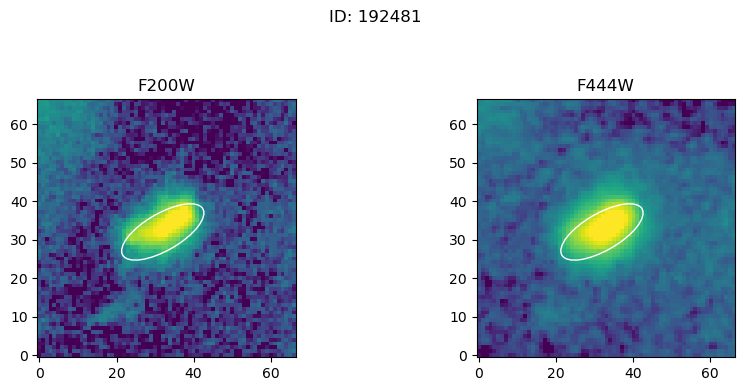

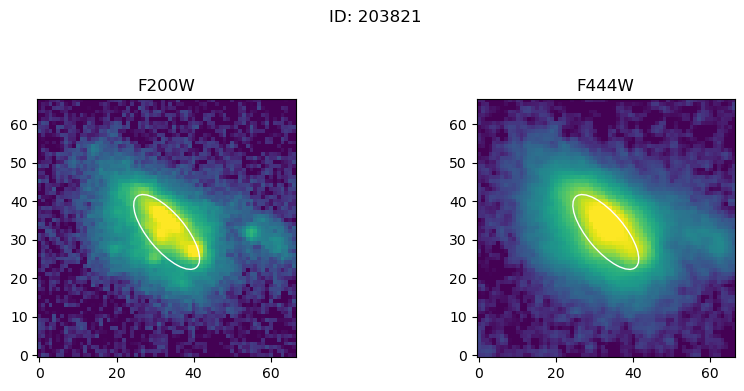

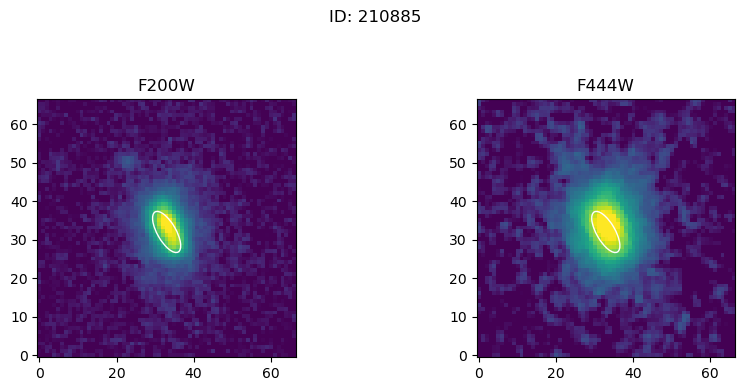

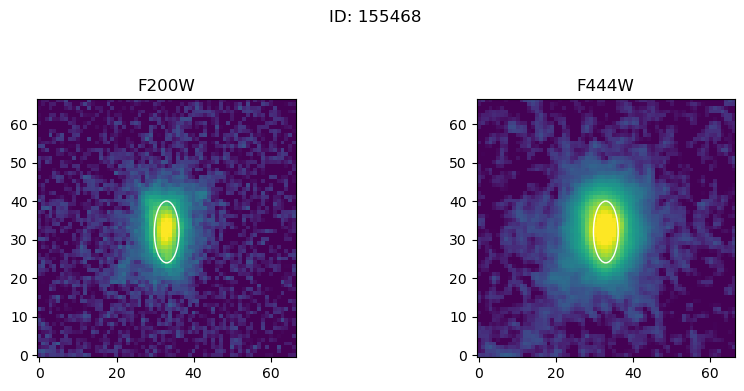

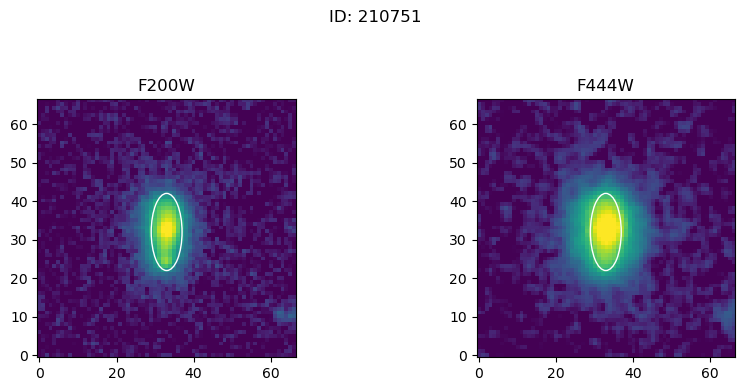

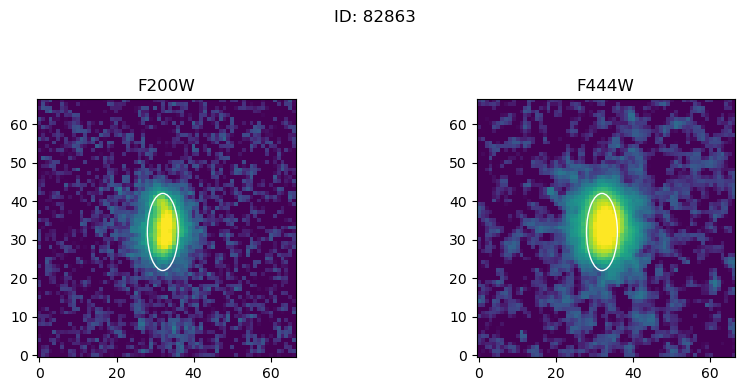

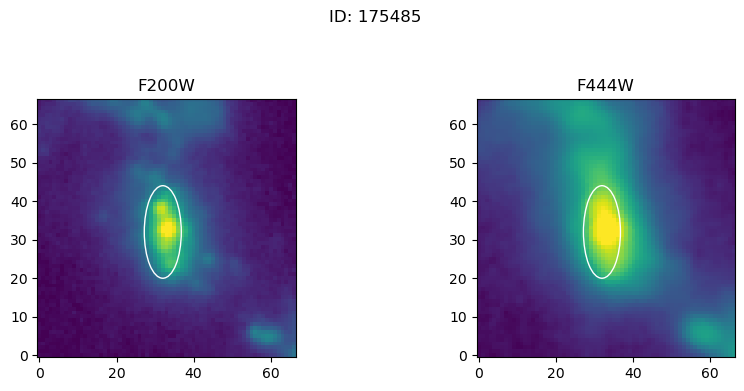

In [6]:
#We provide the elliptical isophote fitter with an initial ellipse to be fitted:
geometry=[]

#1 - ID: 192481
geometry.append(EllipseGeometry(x0=32, y0=32, sma=12, eps=0.6, pa=30.0 * np.pi / 180.0))

#2 - ID: 203821
geometry.append(EllipseGeometry(x0=33, y0=32, sma=12, eps=0.6, pa=130.0 * np.pi / 180.0))

#3 - ID: 210885
geometry.append(EllipseGeometry(x0=33, y0=32, sma=6, eps=0.6, pa=120.0 * np.pi / 180.0))

#4 - ID: 155468
geometry.append(EllipseGeometry(x0=33, y0=32, sma=8, eps=0.6, pa=90.0 * np.pi / 180.0))

#5 - ID: 210751
geometry.append(EllipseGeometry(x0=33, y0=32, sma=10, eps=0.6, pa=90.0 * np.pi / 180.0))

#6 - ID: 82863
geometry.append(EllipseGeometry(x0=32, y0=32, sma=10, eps=0.6, pa=90.0 * np.pi / 180.0))

#7 - ID: 175485
geometry.append(EllipseGeometry(x0=32, y0=32, sma=12, eps=0.6, pa=90.0 * np.pi / 180.0))

#representation:
gal_list=data_sample['ID']
i=0

for gal in gal_list:
    
    #galaxy in both filters:
    image_F200W=cuts_dir_F200W+f"{gal}_cutout.fits"
    image_F444W=cuts_dir_F444W+f"{gal}_cutout.fits"
    hdu_image_F200W=fits.open(image_F200W)
    hdu_image_F444W=fits.open(image_F444W)
    data_F200W=hdu_image_F200W[1].data
    data_F444W=hdu_image_F444W[1].data

    #aperture for both filters:
    aper = EllipticalAperture((geometry[i].x0, geometry[i].y0), geometry[i].sma, 
            geometry[i].sma*(1-geometry[i].eps),geometry[i].pa)

    #normalization of both images:
    img_max_F200W=0.6*np.max(data_F200W)
    img_max_F444W=0.6*np.max(data_F444W)
    norm_F200W = simple_norm(data_F200W, 'log', log_a=70, min_cut=0, max_cut=img_max_F200W)
    norm_F444W = simple_norm(data_F444W, 'log', log_a=70, min_cut=0, max_cut=img_max_F444W)
        
    #plotting:
    fig=plt.figure(figsize=(9, 4.5))
    fig.suptitle(f'ID: {gal}')
    plt.subplots_adjust(hspace=0, wspace=0.7)
        
    plt.subplot(1, 2, 1)
    plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    plt.title("F200W")
    aper.plot(color='white')
        
    plt.subplot(1, 2, 2)
    plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    plt.title("F444W")
    aper.plot(color='white')

    i=i+1

plt.show()

The first fit will be done only in filter F444W and will allow us to determine the center of the ellipse.

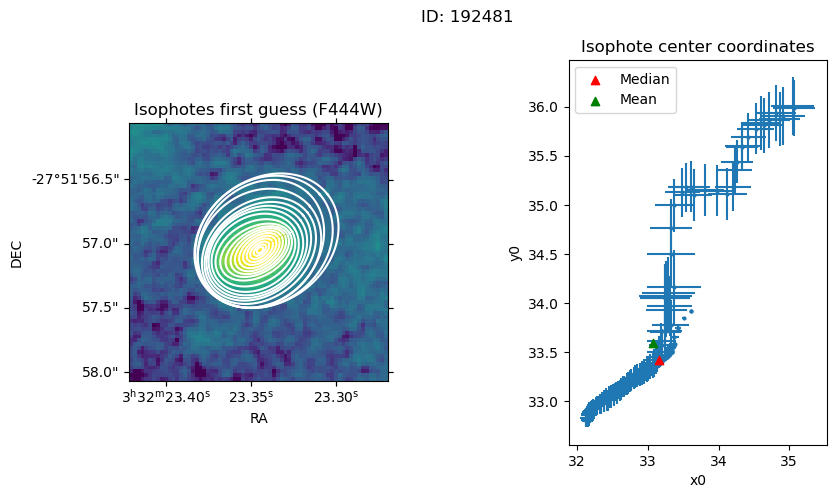

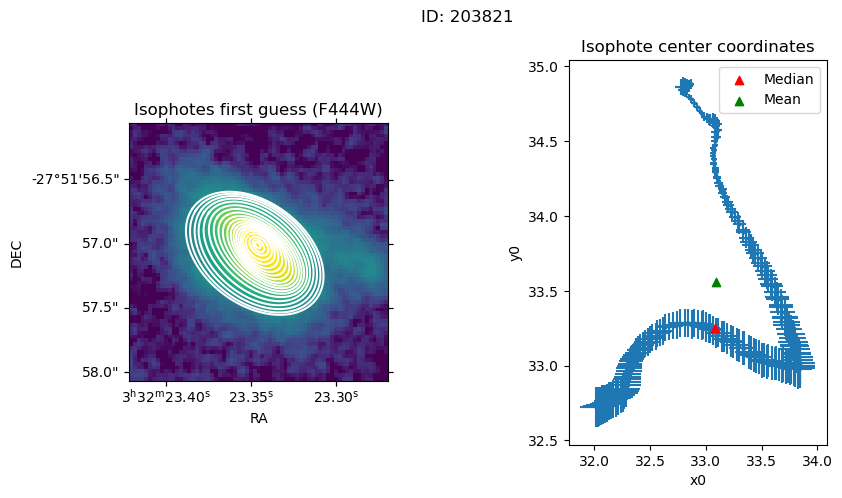

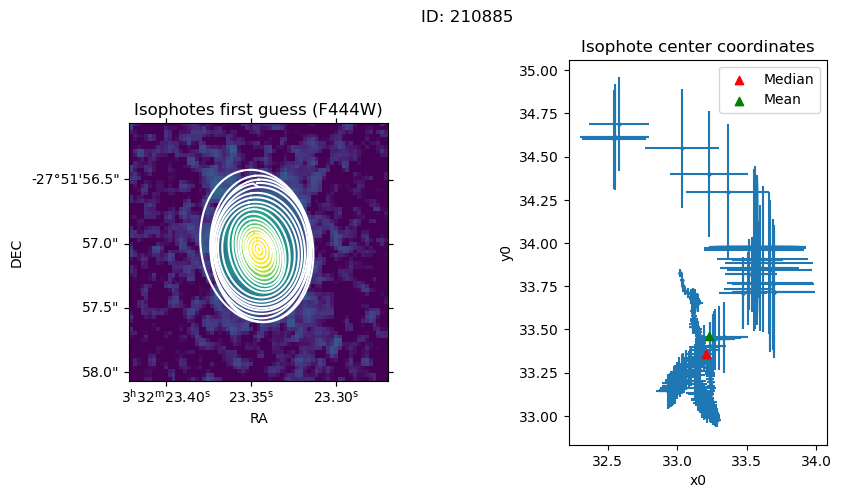

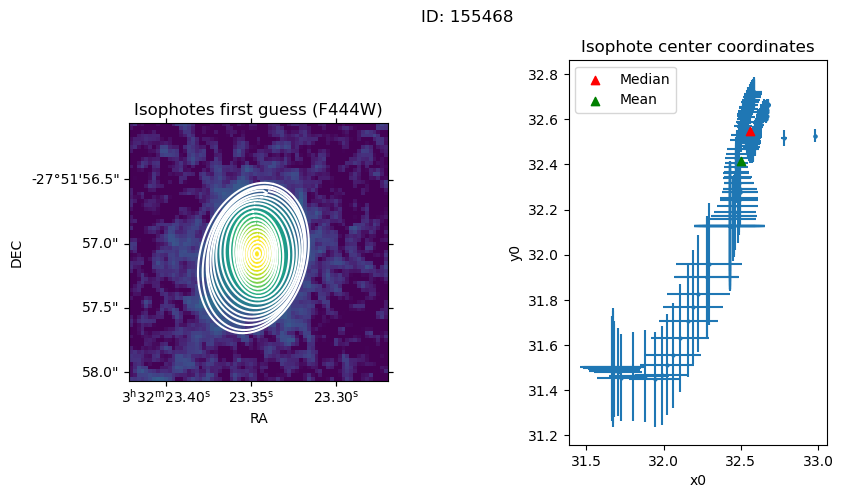

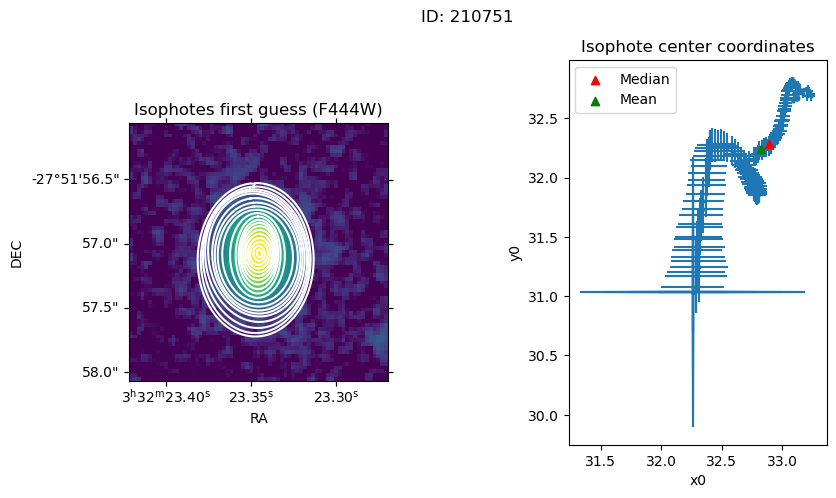

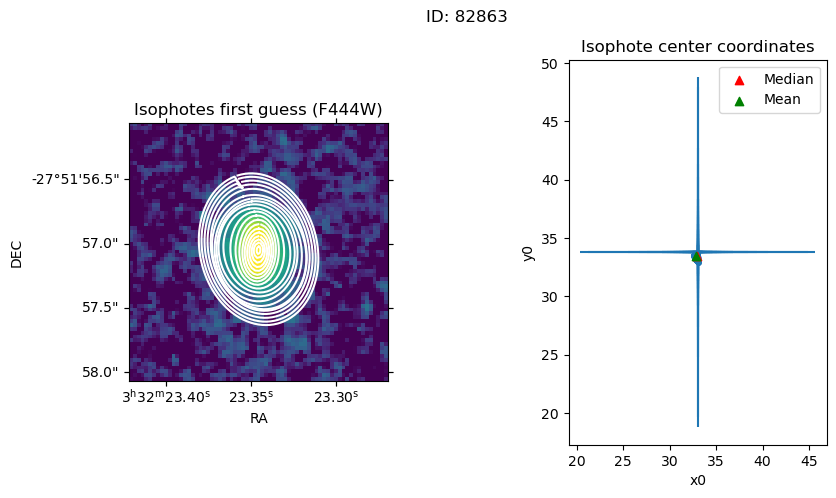

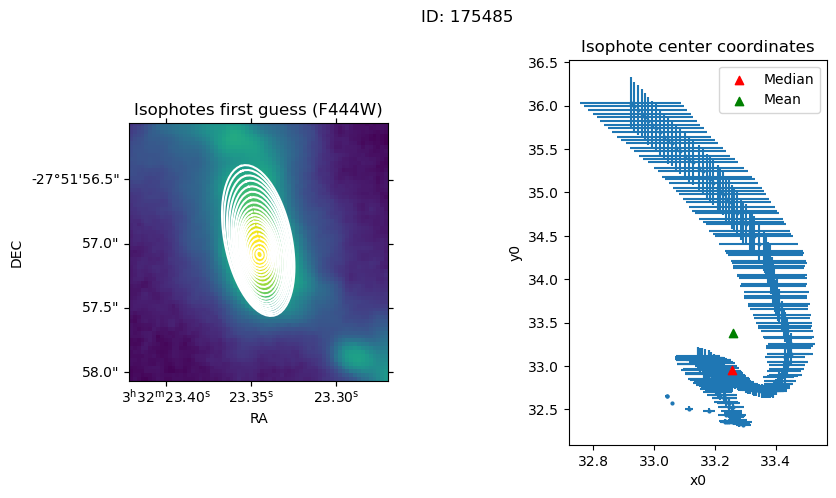

In [7]:
i=0
x0=[]
y0=[]

with PdfPages(res_dir+f'ellipse_center_guess_v1.pdf') as pdf:
    
    for gal in gal_list:
        
        #galaxy in both filters:
        image_F444W=cuts_dir_F444W+f"{gal}_cutout.fits"
        hdu_image_F444W=fits.open(image_F444W)
        data_F444W=hdu_image_F444W[1].data
        
        #coordinates for the image:
        coord=WCS(hdu_image_F200W[1].header)
        
        #Plotting the initial ellipse guess:
        
        #aperture for both filters:
        aper = EllipticalAperture((geometry[i].x0, geometry[i].y0), geometry[i].sma, 
                                  geometry[i].sma*(1-geometry[i].eps),geometry[i].pa)
        
        #normalization of both images:
        img_max_F444W=0.6*np.max(data_F444W)
        norm_F444W = simple_norm(data_F444W, 'log', log_a=70, min_cut=0, max_cut=img_max_F444W)

        #ellipse fit:
        ellipse_F444W = Ellipse(data_F444W, geometry[i])
        isolist_F444W = ellipse_F444W.fit_image(fix_center = False, linear=True, maxsma=20)
        ##fix_center is False because we're analyzing how it changes to find the best center
        x0.append(np.median(isolist_F444W.x0))
        y0.append(np.median(isolist_F444W.y0))
        
        #plotting:
        fig=plt.figure(figsize=(9, 5))
        fig.suptitle(f'ID: {gal}')
        plt.subplots_adjust(hspace=0, wspace=0.7)
        
        plt.subplot(1, 2, 1, projection=coord)
        plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
        plt.title("Isophotes first guess (F444W)")
        plt.xlabel('RA')
        plt.ylabel('DEC')
        smas = np.linspace(1, 20, 20)
        for sma in smas:
            iso_F444W = isolist_F444W.get_closest(sma)
            x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
            plt.plot(x_F444W, y_F444W, color='white')

        plt.subplot(1, 2, 2)
        plt.errorbar(isolist_F444W.x0, isolist_F444W.y0, xerr=isolist_F444W.x0_err, 
                     yerr=isolist_F444W.y0_err,fmt='o', markersize=2)
        plt.scatter(np.median(isolist_F444W.x0), np.median(isolist_F444W.y0), color='r', marker='^',
                    label="Median", zorder=10)
        plt.scatter(np.mean(isolist_F444W.x0), np.mean(isolist_F444W.y0), color='g', marker='^', 
                    label="Mean", zorder=10)
        plt.xlabel('x0')
        plt.ylabel('y0')
        plt.title("Isophote center coordinates")
        plt.legend()

        i=i+1
        
        pdf.savefig(bbox_inches="tight")

The ellipses above that are fitted all have the same maximum semimajor axis of 20 pixels. All 20 ellipses from 1px to 20px of sma length are plotted on the image; so it's easy to adjust the max sma value for each galaxy in order to stop this initial fitting before the isophotes are affected by light from other sources

## 2.2. Updated geometry for first guess of ellipse fit:

We update the geometry used for the first guess, so it takes into account only the central region of the galaxy: we reduce all smas. This way, the center of the galaxy is determined more accurately for the second ellipse fit.

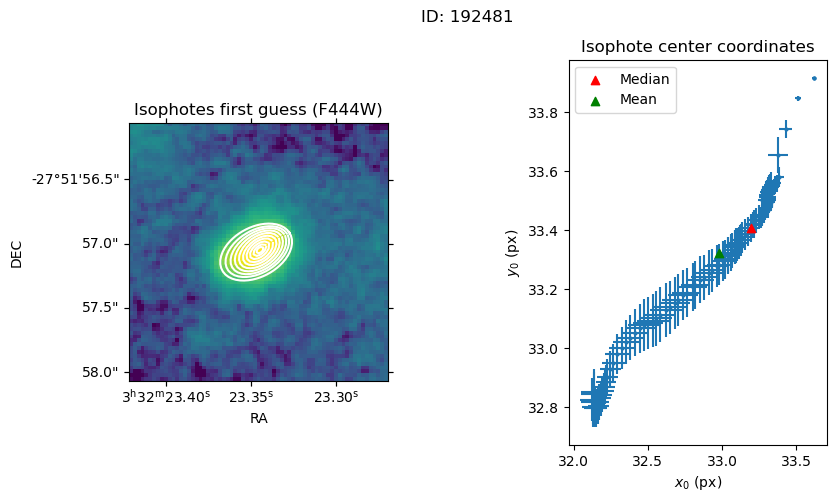

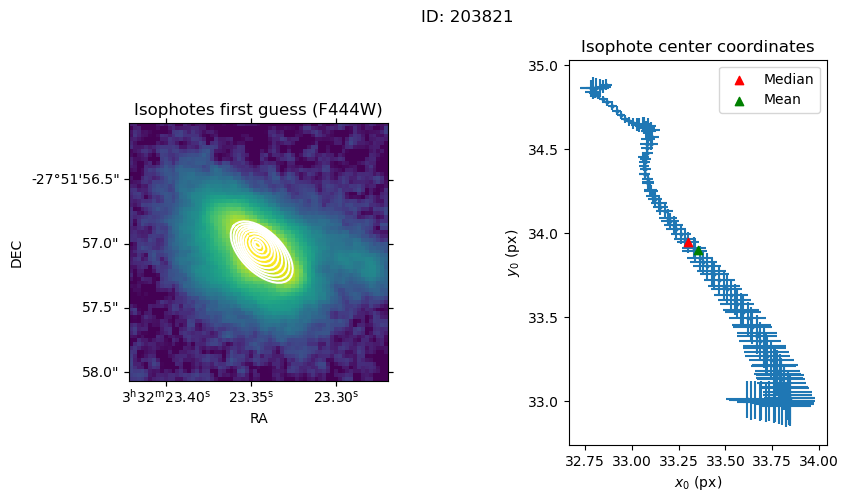

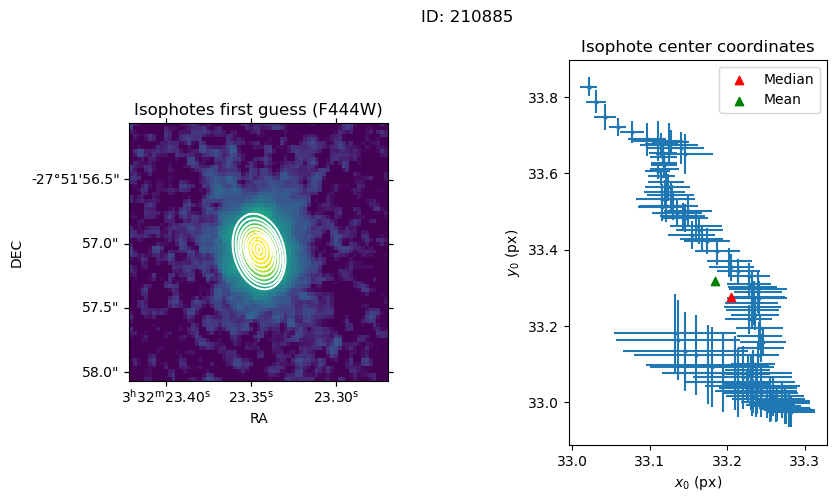

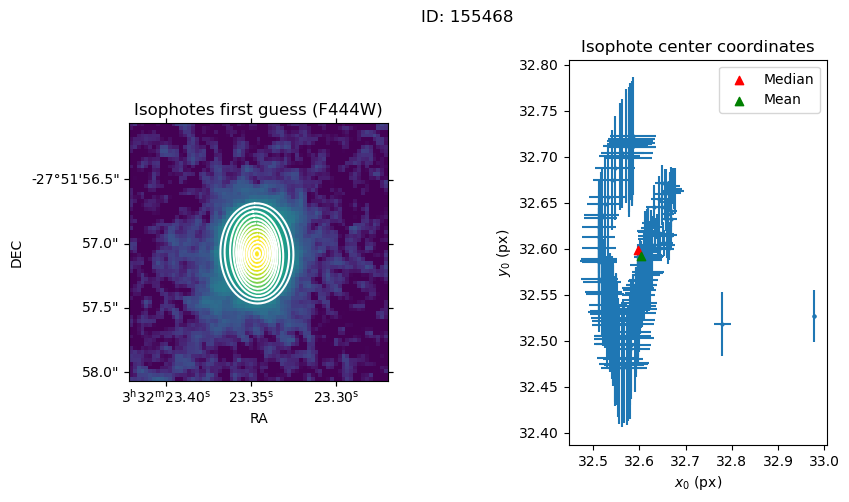

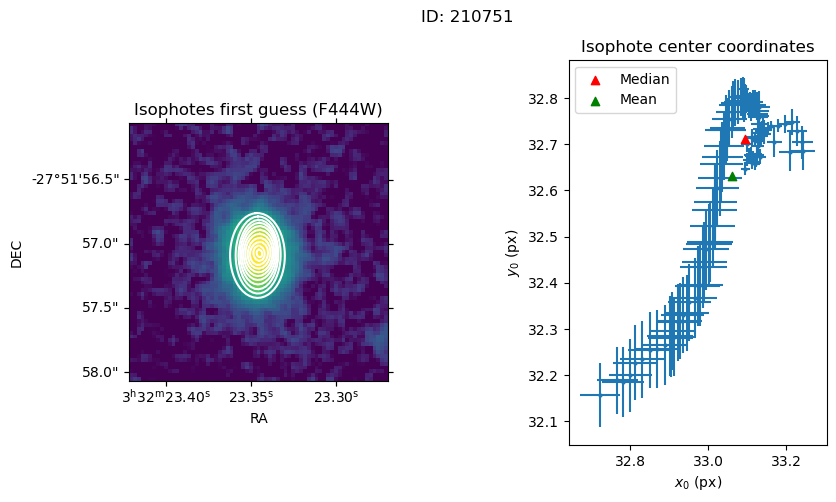

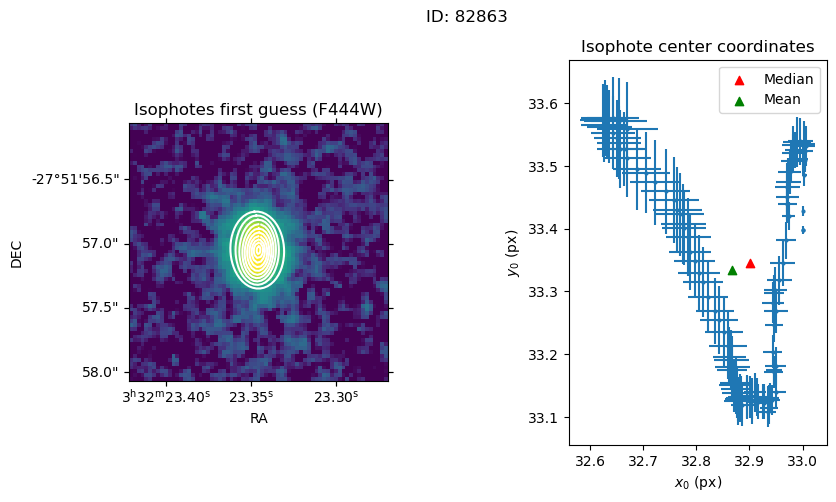

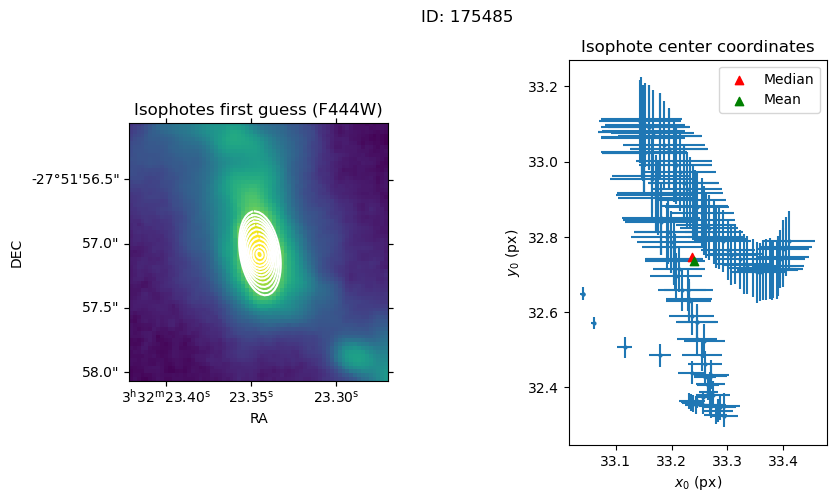

In [8]:
maxsma_list=[]

#1 - ID: 192481
maxsma_list.append(10)

#2 - ID: 203821
maxsma_list.append(10)

#3 - ID: 210885
maxsma_list.append(10)

#4 - ID: 155468
maxsma_list.append(13)

#5 - ID: 210751
maxsma_list.append(11)

#6 - ID: 82863
maxsma_list.append(10)

#7 - ID: 175485
maxsma_list.append(11)

i=0
x0=[]
y0=[]

with PdfPages(res_dir+f'ellipse_center_guess_v2.pdf') as pdf:
    
    for gal in gal_list:
        
        #galaxy in both filters:
        image_F444W=cuts_dir_F444W+f"{gal}_cutout.fits"
        hdu_image_F444W=fits.open(image_F444W)
        data_F444W=hdu_image_F444W[1].data
        
        #coordinates for the image:
        coord=WCS(hdu_image_F200W[1].header)
        
        #Plotting the initial ellipse guess:
        
        #aperture for both filters:
        aper = EllipticalAperture((geometry[i].x0, geometry[i].y0), geometry[i].sma, 
                                  geometry[i].sma*(1-geometry[i].eps),geometry[i].pa)
        
        #normalization of both images:
        img_max_F444W=0.6*np.max(data_F444W)
        norm_F444W = simple_norm(data_F444W, 'log', log_a=70, min_cut=0, max_cut=img_max_F444W)

        #ellipse fit:
        ellipse_F444W = Ellipse(data_F444W, geometry[i])
        isolist_F444W = ellipse_F444W.fit_image(fix_center = False, linear=True, maxsma=maxsma_list[i])
        ##fix_center is False because we're analyzing how it changes to find the best center
        x0.append(np.median(isolist_F444W.x0))
        y0.append(np.median(isolist_F444W.y0))
        
        #plotting:
        fig=plt.figure(figsize=(9, 5))
        fig.suptitle(f'ID: {gal}')
        plt.subplots_adjust(hspace=0, wspace=0.7)
        
        plt.subplot(1, 2, 1, projection=coord)
        plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
        plt.title("Isophotes first guess (F444W)")
        plt.xlabel('RA')
        plt.ylabel('DEC')
        smas = np.linspace(1, maxsma_list[i], maxsma_list[i])
        for sma in smas:
            iso_F444W = isolist_F444W.get_closest(sma)
            x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
            plt.plot(x_F444W, y_F444W, color='white')

        plt.subplot(1, 2, 2)
        plt.errorbar(isolist_F444W.x0, isolist_F444W.y0, xerr=isolist_F444W.x0_err, 
                     yerr=isolist_F444W.y0_err,fmt='o', markersize=2)
        plt.scatter(np.median(isolist_F444W.x0), np.median(isolist_F444W.y0), color='r', marker='^',
                    label="Median", zorder=10)
        plt.scatter(np.mean(isolist_F444W.x0), np.mean(isolist_F444W.y0), color='g', marker='^', 
                    label="Mean", zorder=10)
        plt.xlabel(r'$x_0$ (px)')
        plt.ylabel(r'$y_0$ (px)')
        plt.title("Isophote center coordinates")
        plt.legend()

        i=i+1
        
        pdf.savefig(bbox_inches="tight")

# 3. Fit for each galaxy:

We must fit each galaxy individually because each needs different parameters. Mininum semimajor axis (minsma) depends on the resolution (PSF) of each filter:
    
    - PSF for F444W: 0.145 arcsec
    - PSF for F200W: 0.066 arcsec
    - JADES pixel scale: 0.030''/px

In [9]:
minsma_F200W=0.066/0.03
minsma_F444W=0.145/0.03

Some comments on the choices made for the plots bellow:
- Mean PA is calculated from the mean of all PA values (including both filters). The interval is given by mean(PA) +/- 10 deg. This is because mean PA of each filter (and intervals) are very close and representing the separate mean PA for each filter (with interval) makes the graph unreadable.
- For visualization purposes, we're using a logarithmic normalization (log_a=70). The full description of the funcion LogStretch and its parameters can be found in https://docs.astropy.org/en/stable/api/astropy.visualization.LogStretch.html#logstretch ; here, it's enough to say that the parameter log_a in a stretch/transformation $x\rightarrow y$ is given by: $y=\frac{\log(ax+1)}{\log(a+1)}$

## 3.1. ID: 192481

The problem with this galaxy is that it doesn't fit properly in the central region (sma<4, only F222W filter). We represent it again, increasing the contrast and the minimum value so the external part of the galaxy is discarded, and we analyze where the center obtained from the first elliptical fit is.

In [10]:
#some parameters that are different for each galaxy:
n=0             #this must me equal to ID-1
gal=gal_list[n] #galaxy ID
maxsma=20       #maximum semimajor axis (THIS IS ALSO IMPORTANT FOR GEOMETRY GUESS)
sma0=5          #value from which to interpolate sma
smabreak=15     #sma value where isophotes change from bar to arms+disk
ymin_PA=0       #minimum position angle in plot
ymax_PA=75      #maximum position angle in plot

#guesses for the updated geometry of the galaxy:
eps=0.8
pa=40 #degrees

In [11]:
#galaxy in both filters:
image_F200W=cuts_dir_F200W+f"{gal}_cutout.fits"
image_F444W=cuts_dir_F444W+f"{gal}_cutout.fits"
hdu_image_F200W=fits.open(image_F200W)
hdu_image_F444W=fits.open(image_F444W)
data_F200W=hdu_image_F200W[1].data
data_F444W=hdu_image_F444W[1].data
        
#coordinates for the image:
coord=WCS(hdu_image_F200W[1].header)
        
#Plotting the initial ellipse guess:
        
#aperture for both filters:
aper = EllipticalAperture((geometry[n].x0, geometry[n].y0), geometry[n].sma, 
                          geometry[n].sma*(1-geometry[n].eps),geometry[n].pa)
        
#ellipse fit:
ellipse_F444W = Ellipse(data_F444W, geometry[n])
isolist_F444W = ellipse_F444W.fit_image(fix_center = False, linear=True)
ellipse_F200W = Ellipse(data_F200W, geometry[n])
isolist_F200W = ellipse_F200W.fit_image(fix_center = False, linear=True)
##fix_center is False because we're analyzing how it changes to find the best center

#updating geometry:
x0_F444W=np.mean(isolist_F444W.x0)
y0_F444W=np.mean(isolist_F444W.y0)
geometry_2=EllipseGeometry(x0=x0_F444W, y0=y0_F444W, sma=sma0, eps=eps, pa=pa * np.pi / 180.0)

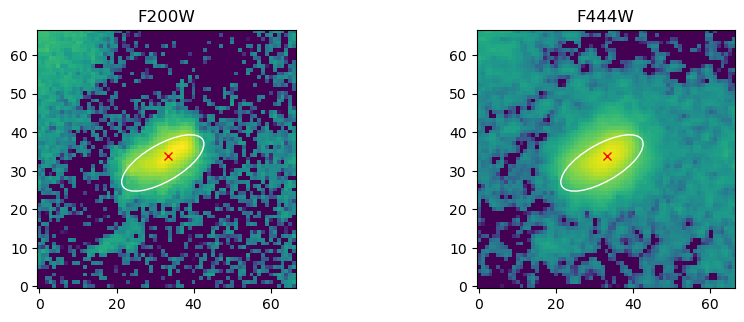

In [12]:
norm_F200W = simple_norm(data_F200W, 'log', log_a=5000, min_cut=0.005, max_cut=0.5)
norm_F444W = simple_norm(data_F444W, 'log', log_a=5000, min_cut=0.005, max_cut=0.5)

#plotting:
fig=plt.figure(figsize=(9, 5))
plt.subplots_adjust(hspace=0, wspace=0.7)
        
plt.subplot(1, 2, 1)
plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
plt.title("F200W")
plt.plot(np.mean(isolist_F200W.x0), np.mean(isolist_F200W.y0), color='red', marker='x')
aper.plot(color='white')

        
plt.subplot(1, 2, 2)
plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
plt.title("F444W")
plt.plot(np.mean(isolist_F444W.x0), np.mean(isolist_F444W.y0), color='red', marker='x')
aper.plot(color='white')

plt.show()

Clearly, the guess looks centered for F444W filter but it isn't for F200W. We change the geometry for F200W filter; the plotted red cross marks the center determined by the new geometry.

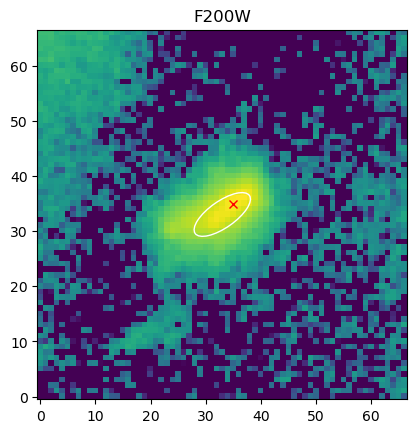

In [13]:
new_geom=EllipseGeometry(x0=33, y0=33, sma=6, eps=0.6, pa=35.0 * np.pi / 180.0)
aper = EllipticalAperture((new_geom.x0, new_geom.y0), new_geom.sma, 
                          new_geom.sma*(1-new_geom.eps),new_geom.pa)
        
#ellipse fit:
ellipse_F200W = Ellipse(data_F200W, new_geom)
isolist_F200W = ellipse_F200W.fit_image(fix_center = False, linear=True, maxsma=6)

#plotting:
plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
plt.title("F200W")
plt.plot(np.mean(isolist_F200W.x0), np.mean(isolist_F200W.y0), color='red', marker='x')
aper.plot(color='white')

plt.show()

In [14]:
#updating geometry for filter F200W:
x0_F200W=round(np.mean(isolist_F200W.x0),5)
y0_F200W=round(np.mean(isolist_F200W.y0),5)
new_geom_2=EllipseGeometry(x0=x0_F200W, y0=y0_F200W, sma=sma0, eps=eps, pa=pa * np.pi / 180.0)

#new guess for ellipses:
ellipse_F200W = Ellipse(data_F200W, new_geom_2)
isolist_F200W = ellipse_F200W.fit_image(fix_center = True, linear=True, minsma=0.5, 
                maxsma=maxsma, conver=0.01, maxgerr=0.95, step=0.5, sma0=sma0)
        
ellipse_F444W = Ellipse(data_F444W, geometry_2)
isolist_F444W = ellipse_F444W.fit_image(fix_center = True, linear=True, minsma=0.5, 
                maxsma=maxsma, conver=0.01, maxgerr=0.95, step=0.5, sma0=sma0)

In [15]:
print(isolist_F200W.stop_code)
print(isolist_F444W.stop_code)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2.]


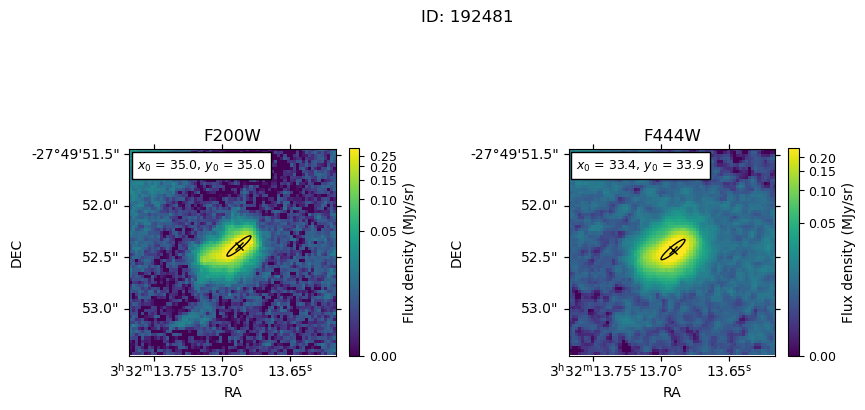

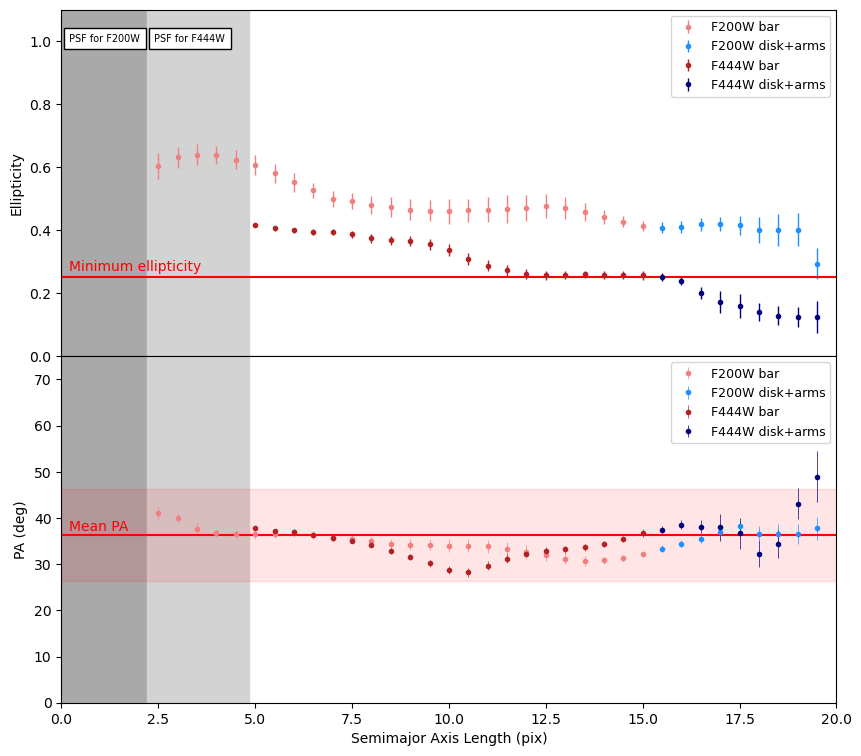

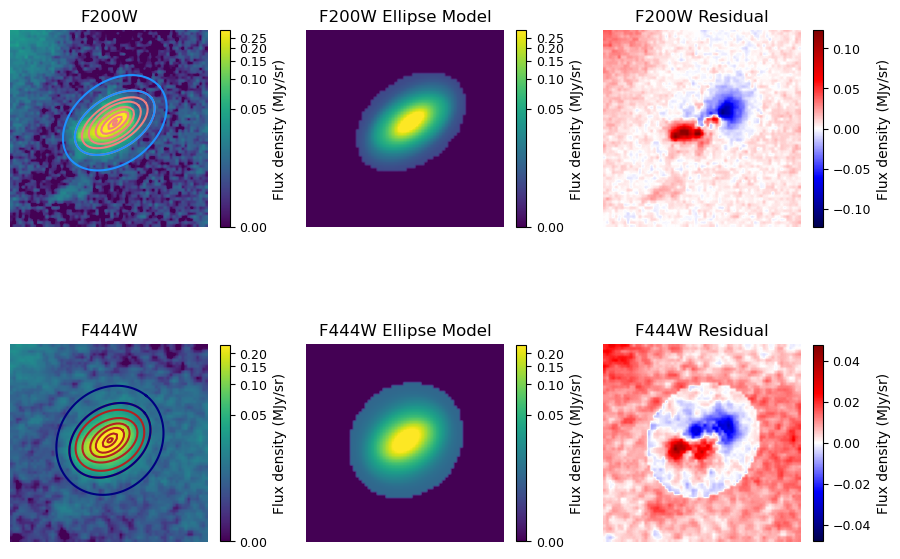

In [16]:
with PdfPages(res_dir+f'{gal}_isophotal_analysis.pdf') as pdf:

    #FIRST PAGE: Galaxy in F200W and F444W filters with initial ellipse guess to fit
        
    #Plotting the second initial ellipse guess:
        
    #aperture for each filter:
    #F444W:
    aper = EllipticalAperture((geometry_2.x0, geometry_2.y0), geometry_2.sma, 
                              geometry_2.sma*(1-geometry_2.eps), geometry_2.pa)
    #F200W:
    aper_2 = EllipticalAperture((new_geom_2.x0, new_geom_2.y0), new_geom_2.sma, 
                          new_geom_2.sma*(1-new_geom_2.eps),new_geom_2.pa)

        
    #normalization of both images:
    img_max_F200W=0.6*np.max(data_F200W)
    img_max_F444W=0.6*np.max(data_F444W)
    norm_F200W = simple_norm(data_F200W, 'log', log_a=70, min_cut=0, max_cut=img_max_F200W)
    norm_F444W = simple_norm(data_F444W, 'log', log_a=70, min_cut=0, max_cut=img_max_F444W)
        
    #plotting:
    fig=plt.figure(figsize=(9, 5))
    fig.suptitle(f'ID: {gal}')
    plt.subplots_adjust(hspace=0, wspace=0.7)

    box_props = dict(facecolor='white', edgecolor='black')
    
    plt.subplot(1, 2, 1, projection=coord)
    plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    cbar=plt.colorbar(shrink=0.54, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    plt.title("F200W")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    aper_2.plot(color='k')
    plt.plot(x0_F200W, y0_F200W, color='k', marker='x')
    plt.text(x=2,y=60,s=r'$x_0$ = {:.1f}, $y_0$ = {:.1f}'.format(x0_F200W, y0_F200W), 
             bbox=box_props, fontsize=9)
        
    plt.subplot(1, 2, 2, projection=coord)
    plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    cbar=plt.colorbar(shrink=0.54, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    plt.title("F444W")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    aper.plot(color='k')
    plt.plot(x0_F444W, y0_F444W, color='k', marker='x')
    plt.text(x=2,y=60,s=r'$x_0$ = {:.1f}, $y_0$ = {:.1f}'.format(x0_F444W, y0_F444W), 
             bbox=box_props, fontsize=9)
        
    pdf.savefig(bbox_inches="tight")

        
    #SECOND PAGE: Graphs on semimajor axis vs ellipticity and semimajor axis vs position angle
        
    plt.figure(figsize=(10, 9))
    plt.subplots_adjust(hspace=0, wspace=0.35)

    #conditions for bar and disk limits: 
    bar_F200W=(isolist_F200W.sma>minsma_F200W) & (isolist_F200W.sma<=smabreak)
    disk_F200W=isolist_F200W.sma>smabreak
    bar_F444W=(isolist_F444W.sma>minsma_F444W) & (isolist_F444W.sma<=smabreak)
    disk_F444W=isolist_F444W.sma>smabreak

        
    plt.subplot(2, 1, 1)
    plt.errorbar(isolist_F200W.sma[bar_F200W], isolist_F200W.eps[bar_F200W], 
                 yerr=isolist_F200W.ellip_err[bar_F200W], 
                 fmt='o', elinewidth=1, markersize=3, color='lightcoral', label='F200W bar')
    plt.errorbar(isolist_F200W.sma[disk_F200W], isolist_F200W.eps[disk_F200W], 
                 yerr=isolist_F200W.ellip_err[disk_F200W], 
                 fmt='o', elinewidth=1, markersize=3, color='dodgerblue', label='F200W disk+arms')
    plt.errorbar(isolist_F444W.sma[bar_F444W], isolist_F444W.eps[bar_F444W], 
                 yerr=isolist_F444W.ellip_err[bar_F444W], 
                 fmt='o', elinewidth=1, markersize=3, color='firebrick', label='F444W bar')
    plt.errorbar(isolist_F444W.sma[disk_F444W], isolist_F444W.eps[disk_F444W], 
                 yerr=isolist_F444W.ellip_err[disk_F444W], 
                 fmt='o', elinewidth=1, markersize=3, color='navy', label='F444W disk+arms')
    plt.ylabel('Ellipticity')
    plt.legend(fontsize=9)
    
    #lines and aspect of plot:
    plt.xticks([])
    plt.hlines(y=0.25, xmin=0, xmax=maxsma, colors='red')
    plt.ylim(0,1.1)
    plt.xlim(xmin=0,xmax=maxsma)
    plt.fill_betweenx(y=(0,1.1), x1=0, x2=minsma_F200W, color='darkgrey')
    plt.fill_betweenx(y=(0,1.1), x1=minsma_F200W, x2=minsma_F444W, color='lightgrey')
    plt.text(x=0.2, y=0.27, s='Minimum ellipticity', color='red')
    plt.text(x=0.2,y=1,s='PSF for F200W', bbox=box_props, fontsize=7)
    plt.text(x=minsma_F200W+0.2,y=1,s='PSF for F444W', bbox=box_props, fontsize=7)

        
    plt.subplot(2, 1, 2)
    plt.errorbar(isolist_F200W.sma[bar_F200W], isolist_F200W.pa[bar_F200W]/np.pi*180.0, 
                 yerr=isolist_F200W.pa_err[bar_F200W]/np.pi*80.0, fmt='o', color='lightcoral', 
                 elinewidth=0.5, markersize=3, label='F200W bar')
    plt.errorbar(isolist_F200W.sma[disk_F200W], isolist_F200W.pa[disk_F200W]/np.pi*180.0, 
                 yerr=isolist_F200W.pa_err[disk_F200W]/np.pi*80.0, fmt='o', color='dodgerblue', 
                 elinewidth=0.5, markersize=3, label='F200W disk+arms')
    plt.errorbar(isolist_F444W.sma[bar_F444W], isolist_F444W.pa[bar_F444W]/np.pi*180.0, 
                 yerr=isolist_F444W.pa_err[bar_F444W]/np.pi*80.0, fmt='o', color='firebrick', 
                 elinewidth=0.5, markersize=3, label='F444W bar')
    plt.errorbar(isolist_F444W.sma[disk_F444W], isolist_F444W.pa[disk_F444W]/np.pi*180.0, 
                 yerr=isolist_F444W.pa_err[disk_F444W]/np.pi*80.0, fmt='o', color='navy', elinewidth=0.5, 
                 markersize=3, label='F444W disk+arms')
    plt.xlabel('Semimajor Axis Length (pix)')
    plt.ylabel('PA (deg)')
    plt.legend(fontsize=9)

    #lines and aspect of plot:
    plt.ylim(ymin_PA,ymax_PA)
    plt.xlim(xmin=0,xmax=maxsma)
    plt.fill_betweenx(y=(ymin_PA,ymax_PA), x1=0, x2=minsma_F200W, color='darkgrey')
    plt.fill_betweenx(y=(ymin_PA,ymax_PA), x1=minsma_F200W, x2=minsma_F444W, color='lightgrey')
    ymean=np.mean(isolist_F200W.pa/np.pi*180.0)
    ymean2=np.mean(isolist_F444W.pa/np.pi*180.0)
    ymean_t=np.mean((ymean,ymean2))
    plt.text(x=0.2, y=ymean_t+1, s='Mean PA', color='red')
    plt.hlines(y=ymean_t, xmin=0, xmax=maxsma, colors='red')
    plt.fill_between(x=(0,maxsma), y1=ymean_t-10, y2=ymean_t+10, color='red', alpha=0.1)


        
    pdf.savefig(bbox_inches="tight")

        
    #THIRD PAGE: data, model and residuals

    #models and residuals:
    model_image_F200W = build_ellipse_model(data_F200W.shape, isolist_F200W)
    residual_F200W = data_F200W - model_image_F200W
    model_image_F444W = build_ellipse_model(data_F444W.shape, isolist_F444W)
    residual_F444W = data_F444W - model_image_F444W
        
    fig, axs = plt.subplots(figsize=(6, 6), nrows=2, ncols=3)
    fig.subplots_adjust(left=0.1, right=1.5, bottom=0.02, top=0.98)
        
    im=axs[0][0].imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    cbar=fig.colorbar(im, ax=axs[0][0], shrink=0.75, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    axs[0][0].set_title('F200W')
    axs[0][0].axis('off')
        
    smas = np.linspace(0.5, smabreak, int(smabreak/2))
    for sma in smas:
        iso_F200W = isolist_F200W.get_closest(sma)
        x_F200W, y_F200W, = iso_F200W.sampled_coordinates()
        axs[0][0].plot(x_F200W, y_F200W, color='lightcoral')
    smas = np.linspace(smabreak, maxsma, int((maxsma-smabreak)/2))
    for sma in smas:
        iso_F200W = isolist_F200W.get_closest(sma)
        x_F200W, y_F200W, = iso_F200W.sampled_coordinates()
        axs[0][0].plot(x_F200W, y_F200W, color='dodgerblue')
        
    im=axs[0][1].imshow(model_image_F200W, origin='lower', norm=norm_F200W, cmap='viridis')
    cbar=fig.colorbar(im, ax=axs[0][1], shrink=0.75, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    axs[0][1].set_title('F200W Ellipse Model')
    axs[0][1].axis('off')
        
    im=axs[0][2].imshow(residual_F200W, norm=CenteredNorm(), origin='lower', cmap='seismic')
    cbar=fig.colorbar(im, ax=axs[0][2], shrink=0.75, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    axs[0][2].set_title('F200W Residual')
    axs[0][2].axis('off')
        
    im=axs[1][0].imshow(data_F444W, norm=norm_F444W, origin='lower', cmap='viridis')
    cbar=fig.colorbar(im, ax=axs[1][0], shrink=0.75, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    axs[1][0].set_title('F444W')
    axs[1][0].axis('off')
        
    smas = np.linspace(0.5, smabreak, int(smabreak/2))
    for sma in smas:
        iso_F444W = isolist_F444W.get_closest(sma)
        x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
        axs[1][0].plot(x_F444W, y_F444W, color='firebrick')
    smas = np.linspace(smabreak, maxsma, int((maxsma-smabreak)/2))
    for sma in smas:
        iso_F444W = isolist_F444W.get_closest(sma)
        x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
        axs[1][0].plot(x_F444W, y_F444W, color='navy')
        
    im=axs[1][1].imshow(model_image_F444W, norm=norm_F444W, origin='lower', cmap='viridis')
    cbar=fig.colorbar(im, ax=axs[1][1], shrink=0.75, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    axs[1][1].set_title('F444W Ellipse Model')
    axs[1][1].axis('off')
        
    im=axs[1][2].imshow(residual_F444W, norm=CenteredNorm(), origin='lower', cmap='seismic')
    cbar=fig.colorbar(im, ax=axs[1][2], shrink=0.75, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    axs[1][2].set_title('F444W Residual')
    axs[1][2].axis('off')

        
    pdf.savefig(bbox_inches="tight")

## 3.2. ID: 203821

STILL NEEDS TO BE MASKED!

In [17]:
#some parameters that are different for each galaxy:
n=1             #this must me equal to ID-1
gal=gal_list[n] #galaxy ID
maxsma=30       #maximum semimajor axis
sma0=10         #value from which to interpolate sma
smabreak=19     #sma value where isophotes change from bar to arms+disk
ymin_PA=50       #minimum position angle in plot
ymax_PA=210      #maximum position angle in plot

#guesses for the updated geometry of the galaxy:
sma=12
eps=0.6
pa=130 #degrees

In [18]:
#galaxy in both filters:
image_F200W=cuts_dir_F200W+f"{gal}_cutout.fits"
image_F444W=cuts_dir_F444W+f"{gal}_cutout.fits"
hdu_image_F200W=fits.open(image_F200W)
hdu_image_F444W=fits.open(image_F444W)
data_F200W=hdu_image_F200W[1].data
data_F444W=hdu_image_F444W[1].data
        
#coordinates for the image:
coord=WCS(hdu_image_F200W[1].header)
        
#ellipse fit:
new_geom=EllipseGeometry(x0=33, y0=32, sma=10, eps=0.6, pa=130.0 * np.pi / 180.0)

ellipse_F444W = Ellipse(data_F444W, geometry[n])
isolist_F444W = ellipse_F444W.fit_image(fix_center = False, linear=True)

ellipse_F200W = Ellipse(data_F200W, new_geom)
isolist_F200W = ellipse_F200W.fit_image(fix_center = False, linear=True)
##fix_center is False because we're analyzing how it changes to find the best center

#geometry centers:
x0_F200W=np.mean(isolist_F200W.x0)
y0_F200W=np.mean(isolist_F200W.y0)
x0_F444W=np.mean(isolist_F444W.x0)
y0_F444W=np.mean(isolist_F444W.y0)

#updating geometry:
geometry_2=EllipseGeometry(x0=x0_F444W, y0=y0_F444W, sma=sma, eps=eps, pa=pa * np.pi / 180.0)
new_geometry_2=EllipseGeometry(x0=x0_F200W, y0=y0_F200W, sma=sma, eps=eps, pa=pa * np.pi / 180.0)

#updating apertures:
aper = EllipticalAperture((geometry_2.x0, geometry_2.y0), geometry_2.sma, 
                              geometry_2.sma*(1-geometry_2.eps), geometry_2.pa)
aper_2 = EllipticalAperture((new_geometry_2.x0, new_geometry_2.y0), new_geometry_2.sma, 
                              new_geometry_2.sma*(1-new_geometry_2.eps), new_geometry_2.pa)

#final ellipse fit:
ellipse_F200W = Ellipse(data_F200W, geometry_2)
isolist_F200W = ellipse_F200W.fit_image(fix_center = True, linear=True, minsma=0.5, 
                maxsma=maxsma, conver=0.01, maxgerr=0.95, step=0.5, sma0=sma0)
        
ellipse_F444W = Ellipse(data_F444W, geometry_2)
isolist_F444W = ellipse_F444W.fit_image(fix_center = True, linear=True, minsma=0.5, 
                maxsma=maxsma, conver=0.01, maxgerr=0.95, step=0.5, sma0=sma0)

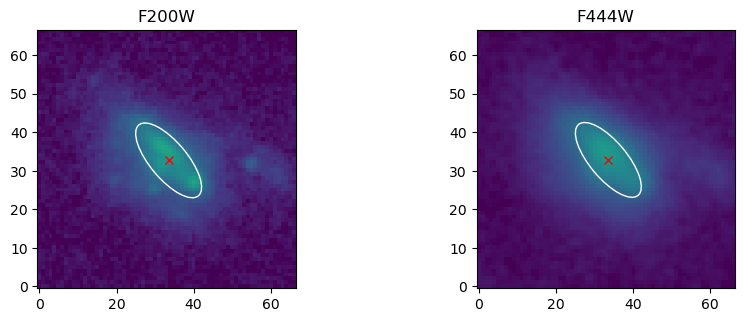

In [19]:
norm_F200W = simple_norm(data_F200W, 'log', log_a=500, min_cut=-0.001, max_cut=5)
norm_F444W = simple_norm(data_F444W, 'log', log_a=500, min_cut=-0.001, max_cut=5)

#plotting:
fig=plt.figure(figsize=(9, 5))
plt.subplots_adjust(hspace=0, wspace=0.7)
        
plt.subplot(1, 2, 1)
plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
plt.title("F200W")
plt.plot(x0_F200W, y0_F200W, color='red', marker='x')
aper_2.plot(color='white')

        
plt.subplot(1, 2, 2)
plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
plt.title("F444W")
plt.plot(x0_F444W, y0_F444W, color='red', marker='x')
aper.plot(color='white')

plt.show()

In [20]:
print(isolist_F200W.stop_code)
print(isolist_F444W.stop_code)

[5. 5. 5. 2. 0. 2. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 2. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Central part of galaxy fits properly (for sma>minsma); values equaling 5 are for sma sizes inferior to PSF.

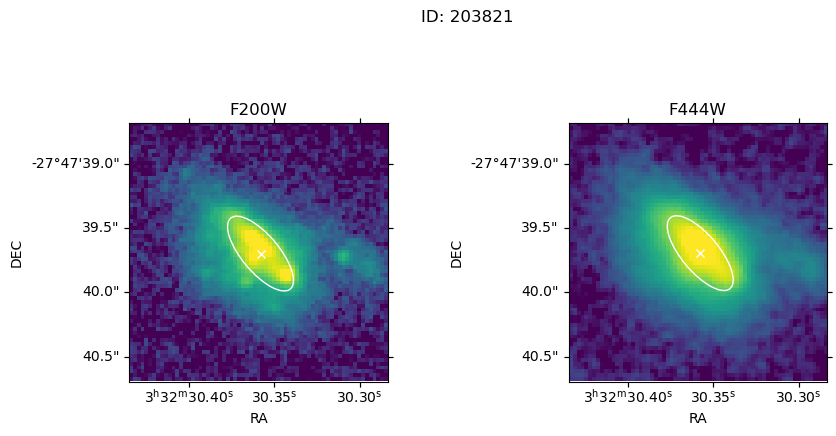

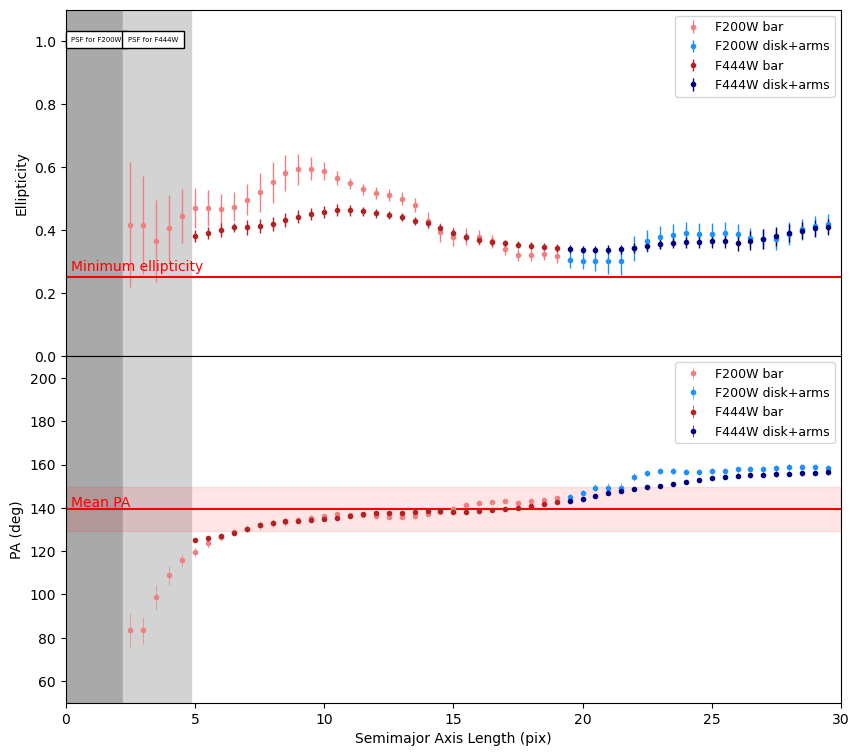

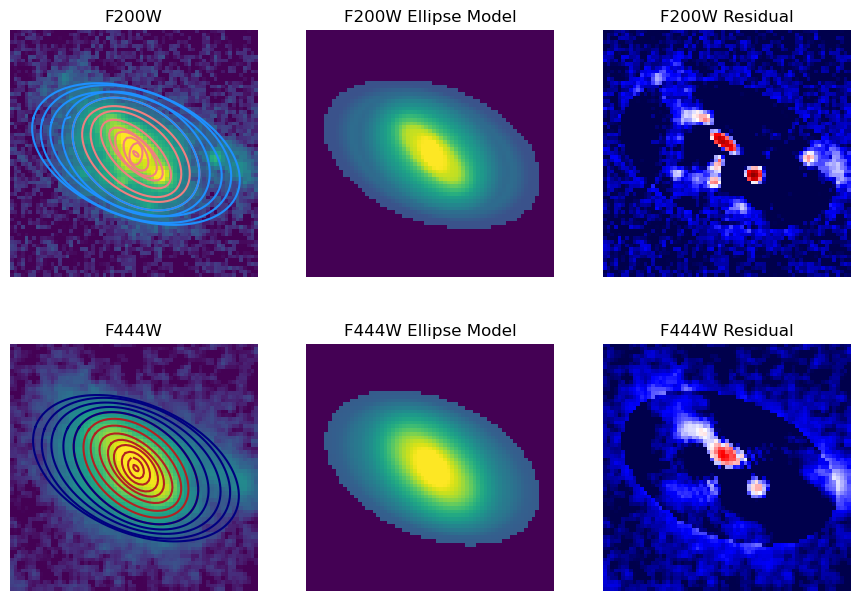

In [21]:
with PdfPages(res_dir+f'{gal}_isophotal_analysis.pdf') as pdf:

    #FIRST PAGE: Galaxy in F200W and F444W filters with initial ellipse guess to fit
        
    #Plotting the second initial ellipse guess:
        
    #normalization of both images:
    img_max_F200W=0.6*np.max(data_F200W)
    img_max_F444W=0.6*np.max(data_F444W)
    norm_F200W = simple_norm(data_F200W, 'log', log_a=70, min_cut=0, max_cut=img_max_F200W)
    norm_F444W = simple_norm(data_F444W, 'log', log_a=70, min_cut=0, max_cut=img_max_F444W)
        
    #plotting:
    fig=plt.figure(figsize=(9, 5))
    fig.suptitle(f'ID: {gal}')
    plt.subplots_adjust(hspace=0, wspace=0.7)
        
    plt.subplot(1, 2, 1, projection=coord)
    plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    plt.title("F200W")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    aper_2.plot(color='white')
    plt.plot(x0_F200W, y0_F200W, color='white', marker='x')
        
    plt.subplot(1, 2, 2, projection=coord)
    plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    plt.title("F444W")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    aper.plot(color='white')
    plt.plot(x0_F444W, y0_F444W, color='white', marker='x')
        
    pdf.savefig(bbox_inches="tight")

        
    #SECOND PAGE: Graphs on semimajor axis vs ellipticity and semimajor axis vs position angle
        
    plt.figure(figsize=(10, 9))
    plt.subplots_adjust(hspace=0, wspace=0.35)

    #conditions for bar and disk limits: 
    bar_F200W=(isolist_F200W.sma>minsma_F200W) & (isolist_F200W.sma<=smabreak)
    disk_F200W=isolist_F200W.sma>smabreak
    bar_F444W=(isolist_F444W.sma>minsma_F444W) & (isolist_F444W.sma<=smabreak)
    disk_F444W=isolist_F444W.sma>smabreak
        
    plt.subplot(2, 1, 1)
    plt.errorbar(isolist_F200W.sma[bar_F200W], isolist_F200W.eps[bar_F200W], 
                 yerr=isolist_F200W.ellip_err[bar_F200W], 
                 fmt='o', elinewidth=1, markersize=3, color='lightcoral', label='F200W bar')
    plt.errorbar(isolist_F200W.sma[disk_F200W], isolist_F200W.eps[disk_F200W], 
                 yerr=isolist_F200W.ellip_err[disk_F200W], 
                 fmt='o', elinewidth=1, markersize=3, color='dodgerblue', label='F200W disk+arms')
    plt.errorbar(isolist_F444W.sma[bar_F444W], isolist_F444W.eps[bar_F444W], 
                 yerr=isolist_F444W.ellip_err[bar_F444W], 
                 fmt='o', elinewidth=1, markersize=3, color='firebrick', label='F444W bar')
    plt.errorbar(isolist_F444W.sma[disk_F444W], isolist_F444W.eps[disk_F444W], 
                 yerr=isolist_F444W.ellip_err[disk_F444W], 
                 fmt='o', elinewidth=1, markersize=3, color='navy', label='F444W disk+arms')
    plt.ylabel('Ellipticity')
    plt.legend(fontsize=9)
    
    #lines and aspect of plot:
    plt.xticks([])
    plt.hlines(y=0.25, xmin=0, xmax=maxsma, colors='red')
    plt.ylim(0,1.1)
    plt.xlim(xmin=0,xmax=maxsma)
    plt.fill_betweenx(y=(0,1.1), x1=0, x2=minsma_F200W, color='darkgrey')
    plt.fill_betweenx(y=(0,1.1), x1=minsma_F200W, x2=minsma_F444W, color='lightgrey')
    plt.text(x=0.2, y=0.27, s='Minimum ellipticity', color='red')
    box_props = dict(facecolor='white', edgecolor='black')
    plt.text(x=0.2,y=1,s='PSF for F200W', bbox=box_props, fontsize=5)
    plt.text(x=minsma_F200W+0.2,y=1,s='PSF for F444W', bbox=box_props, fontsize=5)

        
    plt.subplot(2, 1, 2)
    plt.errorbar(isolist_F200W.sma[bar_F200W], isolist_F200W.pa[bar_F200W]/np.pi*180.0, 
                 yerr=isolist_F200W.pa_err[bar_F200W]/np.pi*80.0, fmt='o', color='lightcoral', 
                 elinewidth=0.5, markersize=3, label='F200W bar')
    plt.errorbar(isolist_F200W.sma[disk_F200W], isolist_F200W.pa[disk_F200W]/np.pi*180.0, 
                 yerr=isolist_F200W.pa_err[disk_F200W]/np.pi*80.0, fmt='o', color='dodgerblue', 
                 elinewidth=0.5, markersize=3, label='F200W disk+arms')
    plt.errorbar(isolist_F444W.sma[bar_F444W], isolist_F444W.pa[bar_F444W]/np.pi*180.0, 
                 yerr=isolist_F444W.pa_err[bar_F444W]/np.pi*80.0, fmt='o', color='firebrick', 
                 elinewidth=0.5, markersize=3, label='F444W bar')
    plt.errorbar(isolist_F444W.sma[disk_F444W], isolist_F444W.pa[disk_F444W]/np.pi*180.0, 
                 yerr=isolist_F444W.pa_err[disk_F444W]/np.pi*80.0, fmt='o', color='navy', elinewidth=0.5, 
                 markersize=3, label='F444W disk+arms')
    plt.xlabel('Semimajor Axis Length (pix)')
    plt.ylabel('PA (deg)')
    plt.legend(fontsize=9)

    #lines and aspect of plot:
    plt.ylim(ymin_PA,ymax_PA)
    plt.xlim(xmin=0,xmax=maxsma)
    plt.fill_betweenx(y=(ymin_PA,ymax_PA), x1=0, x2=minsma_F200W, color='darkgrey')
    plt.fill_betweenx(y=(ymin_PA,ymax_PA), x1=minsma_F200W, x2=minsma_F444W, color='lightgrey')
    ymean=np.mean(isolist_F200W.pa/np.pi*180.0)
    ymean2=np.mean(isolist_F444W.pa/np.pi*180.0)
    ymean_t=np.mean((ymean,ymean2))
    plt.text(x=0.2, y=ymean_t+1, s='Mean PA', color='red')
    plt.hlines(y=ymean_t, xmin=0, xmax=maxsma, colors='red')
    plt.fill_between(x=(0,maxsma), y1=ymean_t-10, y2=ymean_t+10, color='red', alpha=0.1)


        
    pdf.savefig(bbox_inches="tight")

        
    #THIRD PAGE: data, model and residuals

    #models and residuals:
    model_image_F200W = build_ellipse_model(data_F200W.shape, isolist_F200W)
    residual_F200W = data_F200W - model_image_F200W
    model_image_F444W = build_ellipse_model(data_F444W.shape, isolist_F444W)
    residual_F444W = data_F444W - model_image_F444W
        
    fig, axs = plt.subplots(figsize=(6, 6), nrows=2, ncols=3)
    fig.subplots_adjust(left=0.1, right=1.5, bottom=0.02, top=0.98)
        
    axs[0][0].imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    axs[0][0].set_title('F200W')
    axs[0][0].axis('off')
        
    smas = np.linspace(0.5, smabreak, int(smabreak/2))
    for sma in smas:
        iso_F200W = isolist_F200W.get_closest(sma)
        x_F200W, y_F200W, = iso_F200W.sampled_coordinates()
        axs[0][0].plot(x_F200W, y_F200W, color='lightcoral')
    smas = np.linspace(smabreak, maxsma, int((maxsma-smabreak)/2))
    for sma in smas:
        iso_F200W = isolist_F200W.get_closest(sma)
        x_F200W, y_F200W, = iso_F200W.sampled_coordinates()
        axs[0][0].plot(x_F200W, y_F200W, color='dodgerblue')
        
    axs[0][1].imshow(model_image_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    axs[0][1].set_title('F200W Ellipse Model')
    axs[0][1].axis('off')
        
    axs[0][2].imshow(residual_F200W, origin='lower',norm=norm_F200W, cmap='seismic')
    axs[0][2].set_title('F200W Residual')
    axs[0][2].axis('off')
        
    axs[1][0].imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    axs[1][0].set_title('F444W')
    axs[1][0].axis('off')
        
    smas = np.linspace(0.5, smabreak, int(smabreak/2))
    for sma in smas:
        iso_F444W = isolist_F444W.get_closest(sma)
        x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
        axs[1][0].plot(x_F444W, y_F444W, color='firebrick')
    smas = np.linspace(smabreak, maxsma, int((maxsma-smabreak)/2))
    for sma in smas:
        iso_F444W = isolist_F444W.get_closest(sma)
        x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
        axs[1][0].plot(x_F444W, y_F444W, color='navy')
        
    axs[1][1].imshow(model_image_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    axs[1][1].set_title('F444W Ellipse Model')
    axs[1][1].axis('off')
        
    axs[1][2].imshow(residual_F444W, origin='lower',norm=norm_F444W, cmap='seismic')
    axs[1][2].set_title('F444W Residual')
    axs[1][2].axis('off')

        
    pdf.savefig(bbox_inches="tight")

## 3.3. ID: 210885

In [22]:
#some parameters that are different for each galaxy:
n=2             #this must me equal to ID-1
gal=gal_list[n] #galaxy ID
maxsma=20       #maximum semimajor axis
sma0=10         #value from which to interpolate sma
smabreak=12     #sma value where isophotes change from bar to arms+disk
ymin_PA=85       #minimum position angle in plot
ymax_PA=135      #maximum position angle in plot

#guesses for the updated geometry of the galaxy:
sma=6
eps=0.6
pa=120 #degrees

In [23]:
#galaxy in both filters:
image_F200W=cuts_dir_F200W+f"{gal}_cutout.fits"
image_F444W=cuts_dir_F444W+f"{gal}_cutout.fits"
hdu_image_F200W=fits.open(image_F200W)
hdu_image_F444W=fits.open(image_F444W)
data_F200W=hdu_image_F200W[1].data
data_F444W=hdu_image_F444W[1].data
        
#coordinates for the image:
coord=WCS(hdu_image_F200W[1].header)
        
#ellipse fit:
new_geom=EllipseGeometry(x0=33, y0=32, sma=10, eps=0.6, pa=130.0 * np.pi / 180.0)

ellipse_F444W = Ellipse(data_F444W, geometry[n])
isolist_F444W = ellipse_F444W.fit_image(fix_center = False, linear=True)

ellipse_F200W = Ellipse(data_F200W, new_geom)
isolist_F200W = ellipse_F200W.fit_image(fix_center = False, linear=True)
##fix_center is False because we're analyzing how it changes to find the best center

#geometry centers:
x0_F200W=np.mean(isolist_F200W.x0)
y0_F200W=np.mean(isolist_F200W.y0)
x0_F444W=np.mean(isolist_F444W.x0)
y0_F444W=np.mean(isolist_F444W.y0)

#updating geometry:
geometry_2=EllipseGeometry(x0=x0_F444W, y0=y0_F444W, sma=sma, eps=eps, pa=pa * np.pi / 180.0)
new_geometry_2=EllipseGeometry(x0=x0_F200W, y0=y0_F200W, sma=sma, eps=eps, pa=pa * np.pi / 180.0)

#updating apertures:
aper = EllipticalAperture((geometry_2.x0, geometry_2.y0), geometry_2.sma, 
                              geometry_2.sma*(1-geometry_2.eps), geometry_2.pa)
aper_2 = EllipticalAperture((new_geometry_2.x0, new_geometry_2.y0), new_geometry_2.sma, 
                              new_geometry_2.sma*(1-new_geometry_2.eps), new_geometry_2.pa)

#final ellipse fit:
ellipse_F200W = Ellipse(data_F200W, geometry_2)
isolist_F200W = ellipse_F200W.fit_image(fix_center = True, linear=True, minsma=0.5, 
                maxsma=maxsma, conver=0.01, maxgerr=0.95, step=0.5, sma0=sma0)
        
ellipse_F444W = Ellipse(data_F444W, geometry_2)
isolist_F444W = ellipse_F444W.fit_image(fix_center = True, linear=True, minsma=0.5, 
                maxsma=maxsma, conver=0.01, maxgerr=0.95, step=0.5, sma0=sma0)

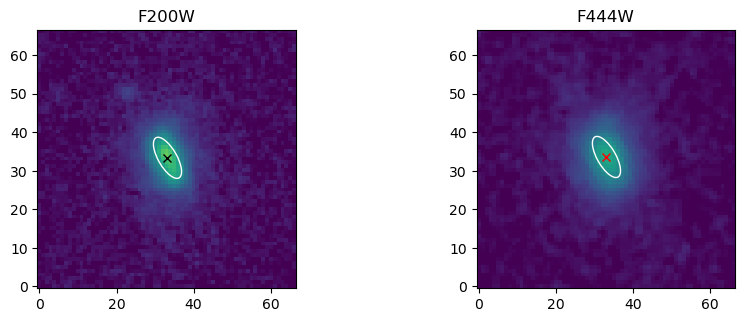

In [24]:
norm_F200W = simple_norm(data_F200W, 'log', log_a=500, min_cut=-0.001, max_cut=5)
norm_F444W = simple_norm(data_F444W, 'log', log_a=500, min_cut=-0.001, max_cut=5)

#plotting:
fig=plt.figure(figsize=(9, 5))
plt.subplots_adjust(hspace=0, wspace=0.7)
        
plt.subplot(1, 2, 1)
plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
plt.title("F200W")
plt.plot(x0_F200W, y0_F200W, color='k', marker='x')
aper_2.plot(color='white')

        
plt.subplot(1, 2, 2)
plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
plt.title("F444W")
plt.plot(x0_F444W, y0_F444W, color='red', marker='x')
aper.plot(color='white')

plt.show()

In [25]:
print(isolist_F200W.stop_code)
print(isolist_F444W.stop_code)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2.]
[0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0.]


Good fit.

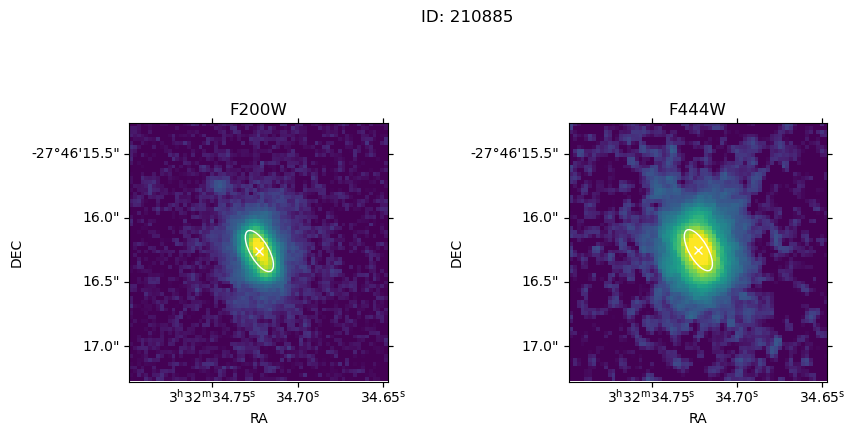

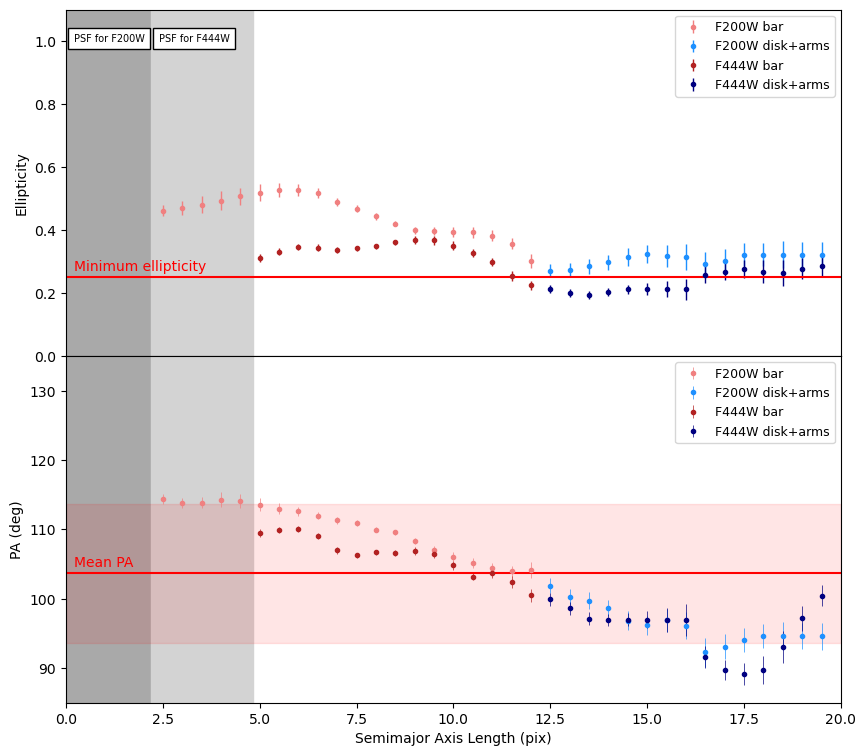

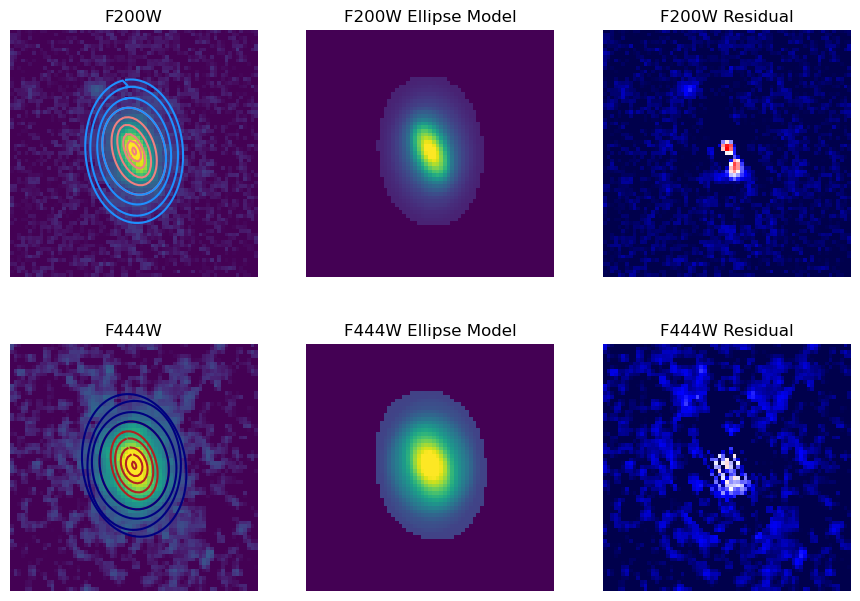

In [26]:
with PdfPages(res_dir+f'{gal}_isophotal_analysis.pdf') as pdf:

    #FIRST PAGE: Galaxy in F200W and F444W filters with initial ellipse guess to fit
        
    #Plotting the second initial ellipse guess:
        
    #normalization of both images:
    img_max_F200W=0.6*np.max(data_F200W)
    img_max_F444W=0.6*np.max(data_F444W)
    norm_F200W = simple_norm(data_F200W, 'log', log_a=70, min_cut=0, max_cut=img_max_F200W)
    norm_F444W = simple_norm(data_F444W, 'log', log_a=70, min_cut=0, max_cut=img_max_F444W)
        
    #plotting:
    fig=plt.figure(figsize=(9, 5))
    fig.suptitle(f'ID: {gal}')
    plt.subplots_adjust(hspace=0, wspace=0.7)
        
    plt.subplot(1, 2, 1, projection=coord)
    plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    plt.title("F200W")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    aper_2.plot(color='white')
    plt.plot(x0_F200W, y0_F200W, color='white', marker='x')
        
    plt.subplot(1, 2, 2, projection=coord)
    plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    plt.title("F444W")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    aper.plot(color='white')
    plt.plot(x0_F444W, y0_F444W, color='white', marker='x')
        
    pdf.savefig(bbox_inches="tight")

        
    #SECOND PAGE: Graphs on semimajor axis vs ellipticity and semimajor axis vs position angle
        
    plt.figure(figsize=(10, 9))
    plt.subplots_adjust(hspace=0, wspace=0.35)

    #conditions for bar and disk limits: 
    bar_F200W=(isolist_F200W.sma>minsma_F200W) & (isolist_F200W.sma<=smabreak)
    disk_F200W=isolist_F200W.sma>smabreak
    bar_F444W=(isolist_F444W.sma>minsma_F444W) & (isolist_F444W.sma<=smabreak)
    disk_F444W=isolist_F444W.sma>smabreak
        
    plt.subplot(2, 1, 1)
    plt.errorbar(isolist_F200W.sma[bar_F200W], isolist_F200W.eps[bar_F200W], 
                 yerr=isolist_F200W.ellip_err[bar_F200W], 
                 fmt='o', elinewidth=1, markersize=3, color='lightcoral', label='F200W bar')
    plt.errorbar(isolist_F200W.sma[disk_F200W], isolist_F200W.eps[disk_F200W], 
                 yerr=isolist_F200W.ellip_err[disk_F200W], 
                 fmt='o', elinewidth=1, markersize=3, color='dodgerblue', label='F200W disk+arms')
    plt.errorbar(isolist_F444W.sma[bar_F444W], isolist_F444W.eps[bar_F444W], 
                 yerr=isolist_F444W.ellip_err[bar_F444W], 
                 fmt='o', elinewidth=1, markersize=3, color='firebrick', label='F444W bar')
    plt.errorbar(isolist_F444W.sma[disk_F444W], isolist_F444W.eps[disk_F444W], 
                 yerr=isolist_F444W.ellip_err[disk_F444W], 
                 fmt='o', elinewidth=1, markersize=3, color='navy', label='F444W disk+arms')
    plt.ylabel('Ellipticity')
    plt.legend(fontsize=9)
    
    #lines and aspect of plot:
    plt.xticks([])
    plt.hlines(y=0.25, xmin=0, xmax=maxsma, colors='red')
    plt.ylim(0,1.1)
    plt.xlim(xmin=0,xmax=maxsma)
    plt.fill_betweenx(y=(0,1.1), x1=0, x2=minsma_F200W, color='darkgrey')
    plt.fill_betweenx(y=(0,1.1), x1=minsma_F200W, x2=minsma_F444W, color='lightgrey')
    plt.text(x=0.2, y=0.27, s='Minimum ellipticity', color='red')
    box_props = dict(facecolor='white', edgecolor='black')
    plt.text(x=0.2,y=1,s='PSF for F200W', bbox=box_props, fontsize=7)
    plt.text(x=minsma_F200W+0.2,y=1,s='PSF for F444W', bbox=box_props, fontsize=7)

        
    plt.subplot(2, 1, 2)
    plt.errorbar(isolist_F200W.sma[bar_F200W], isolist_F200W.pa[bar_F200W]/np.pi*180.0, 
                 yerr=isolist_F200W.pa_err[bar_F200W]/np.pi*80.0, fmt='o', color='lightcoral', 
                 elinewidth=0.5, markersize=3, label='F200W bar')
    plt.errorbar(isolist_F200W.sma[disk_F200W], isolist_F200W.pa[disk_F200W]/np.pi*180.0, 
                 yerr=isolist_F200W.pa_err[disk_F200W]/np.pi*80.0, fmt='o', color='dodgerblue', 
                 elinewidth=0.5, markersize=3, label='F200W disk+arms')
    plt.errorbar(isolist_F444W.sma[bar_F444W], isolist_F444W.pa[bar_F444W]/np.pi*180.0, 
                 yerr=isolist_F444W.pa_err[bar_F444W]/np.pi*80.0, fmt='o', color='firebrick', 
                 elinewidth=0.5, markersize=3, label='F444W bar')
    plt.errorbar(isolist_F444W.sma[disk_F444W], isolist_F444W.pa[disk_F444W]/np.pi*180.0, 
                 yerr=isolist_F444W.pa_err[disk_F444W]/np.pi*80.0, fmt='o', color='navy', elinewidth=0.5, 
                 markersize=3, label='F444W disk+arms')
    plt.xlabel('Semimajor Axis Length (pix)')
    plt.ylabel('PA (deg)')
    plt.legend(fontsize=9)

    #lines and aspect of plot:
    plt.ylim(ymin_PA,ymax_PA)
    plt.xlim(xmin=0,xmax=maxsma)
    plt.fill_betweenx(y=(ymin_PA,ymax_PA), x1=0, x2=minsma_F200W, color='darkgrey')
    plt.fill_betweenx(y=(ymin_PA,ymax_PA), x1=minsma_F200W, x2=minsma_F444W, color='lightgrey')
    ymean=np.mean(isolist_F200W.pa/np.pi*180.0)
    ymean2=np.mean(isolist_F444W.pa/np.pi*180.0)
    ymean_t=np.mean((ymean,ymean2))
    plt.text(x=0.2, y=ymean_t+1, s='Mean PA', color='red')
    plt.hlines(y=ymean_t, xmin=0, xmax=maxsma, colors='red')
    plt.fill_between(x=(0,maxsma), y1=ymean_t-10, y2=ymean_t+10, color='red', alpha=0.1)


        
    pdf.savefig(bbox_inches="tight")

        
    #THIRD PAGE: data, model and residuals

    #models and residuals:
    model_image_F200W = build_ellipse_model(data_F200W.shape, isolist_F200W)
    residual_F200W = data_F200W - model_image_F200W
    model_image_F444W = build_ellipse_model(data_F444W.shape, isolist_F444W)
    residual_F444W = data_F444W - model_image_F444W
        
    fig, axs = plt.subplots(figsize=(6, 6), nrows=2, ncols=3)
    fig.subplots_adjust(left=0.1, right=1.5, bottom=0.02, top=0.98)
        
    axs[0][0].imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    axs[0][0].set_title('F200W')
    axs[0][0].axis('off')
        
    smas = np.linspace(0.5, smabreak, int(smabreak/2))
    for sma in smas:
        iso_F200W = isolist_F200W.get_closest(sma)
        x_F200W, y_F200W, = iso_F200W.sampled_coordinates()
        axs[0][0].plot(x_F200W, y_F200W, color='lightcoral')
    smas = np.linspace(smabreak, maxsma, int((maxsma-smabreak)/2))
    for sma in smas:
        iso_F200W = isolist_F200W.get_closest(sma)
        x_F200W, y_F200W, = iso_F200W.sampled_coordinates()
        axs[0][0].plot(x_F200W, y_F200W, color='dodgerblue')
        
    axs[0][1].imshow(model_image_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    axs[0][1].set_title('F200W Ellipse Model')
    axs[0][1].axis('off')
        
    axs[0][2].imshow(residual_F200W, origin='lower',norm=norm_F200W, cmap='seismic')
    axs[0][2].set_title('F200W Residual')
    axs[0][2].axis('off')
        
    axs[1][0].imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    axs[1][0].set_title('F444W')
    axs[1][0].axis('off')
        
    smas = np.linspace(0.5, smabreak, int(smabreak/2))
    for sma in smas:
        iso_F444W = isolist_F444W.get_closest(sma)
        x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
        axs[1][0].plot(x_F444W, y_F444W, color='firebrick')
    smas = np.linspace(smabreak, maxsma, int((maxsma-smabreak)/2))
    for sma in smas:
        iso_F444W = isolist_F444W.get_closest(sma)
        x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
        axs[1][0].plot(x_F444W, y_F444W, color='navy')
        
    axs[1][1].imshow(model_image_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    axs[1][1].set_title('F444W Ellipse Model')
    axs[1][1].axis('off')
        
    axs[1][2].imshow(residual_F444W, origin='lower',norm=norm_F444W, cmap='seismic')
    axs[1][2].set_title('F444W Residual')
    axs[1][2].axis('off')

        
    pdf.savefig(bbox_inches="tight")

## 3.4. ID: 155468

In [27]:
#some parameters that are different for each galaxy:
n=3             #this must me equal to ID-1
gal=gal_list[n] #galaxy ID
maxsma=20       #maximum semimajor axis
sma0=10         #value from which to interpolate sma
smabreak=14     #sma value where isophotes change from bar to arms+disk
ymin_PA=65       #minimum position angle in plot
ymax_PA=120      #maximum position angle in plot

#guesses for the updated geometry of the galaxy:
sma=8
eps=0.6
pa=90 #degrees

In [28]:
#galaxy in both filters:
image_F200W=cuts_dir_F200W+f"{gal}_cutout.fits"
image_F444W=cuts_dir_F444W+f"{gal}_cutout.fits"
hdu_image_F200W=fits.open(image_F200W)
hdu_image_F444W=fits.open(image_F444W)
data_F200W=hdu_image_F200W[1].data
data_F444W=hdu_image_F444W[1].data
        
#coordinates for the image:
coord=WCS(hdu_image_F200W[1].header)
        
#ellipse fit:
new_geom=EllipseGeometry(x0=33, y0=32, sma=10, eps=0.6, pa=130.0 * np.pi / 180.0)

ellipse_F444W = Ellipse(data_F444W, geometry[n])
isolist_F444W = ellipse_F444W.fit_image(fix_center = False, linear=True)

ellipse_F200W = Ellipse(data_F200W, new_geom)
isolist_F200W = ellipse_F200W.fit_image(fix_center = False, linear=True)
##fix_center is False because we're analyzing how it changes to find the best center

#geometry centers:
x0_F200W=np.mean(isolist_F200W.x0)
y0_F200W=np.mean(isolist_F200W.y0)
x0_F444W=np.mean(isolist_F444W.x0)
y0_F444W=np.mean(isolist_F444W.y0)

#updating geometry:
geometry_2=EllipseGeometry(x0=33, y0=y0_F444W, sma=sma, eps=eps, pa=pa * np.pi / 180.0)
new_geometry_2=EllipseGeometry(x0=x0_F200W, y0=y0_F200W, sma=sma, eps=eps, pa=pa * np.pi / 180.0)

#updating apertures:
aper = EllipticalAperture((geometry_2.x0, geometry_2.y0), geometry_2.sma, 
                              geometry_2.sma*(1-geometry_2.eps), geometry_2.pa)
aper_2 = EllipticalAperture((new_geometry_2.x0, new_geometry_2.y0), new_geometry_2.sma, 
                              new_geometry_2.sma*(1-new_geometry_2.eps), new_geometry_2.pa)

#final ellipse fit:
ellipse_F200W = Ellipse(data_F200W, geometry_2)
isolist_F200W = ellipse_F200W.fit_image(fix_center = True, linear=True, minsma=0.5, 
                maxsma=maxsma, conver=0.01, maxgerr=0.95, step=0.5, sma0=sma0)
        
ellipse_F444W = Ellipse(data_F444W, geometry_2)
isolist_F444W = ellipse_F444W.fit_image(fix_center = True, linear=True, minsma=0.5, 
                maxsma=maxsma, conver=0.01, maxgerr=0.95, step=0.5, sma0=sma0)

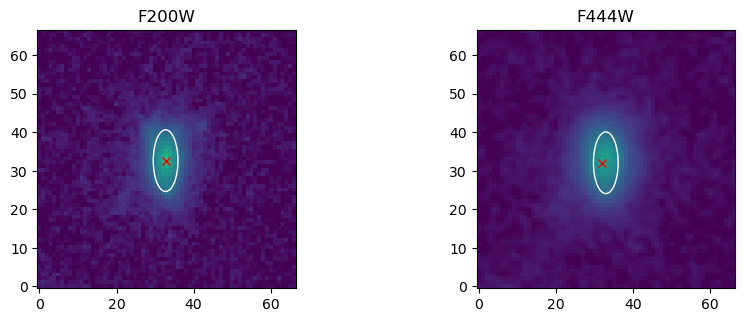

In [29]:
norm_F200W = simple_norm(data_F200W, 'log', log_a=500, min_cut=-0.001, max_cut=5)
norm_F444W = simple_norm(data_F444W, 'log', log_a=500, min_cut=-0.001, max_cut=5)

#plotting:
fig=plt.figure(figsize=(9, 5))
plt.subplots_adjust(hspace=0, wspace=0.7)
        
plt.subplot(1, 2, 1)
plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
plt.title("F200W")
plt.plot(x0_F200W, y0_F200W, color='red', marker='x')
aper_2.plot(color='white')

        
plt.subplot(1, 2, 2)
plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
plt.title("F444W")
plt.plot(x0_F444W, y0_F444W, color='red', marker='x')
aper.plot(color='white')

plt.show()

In [30]:
print(isolist_F200W.stop_code)
print(isolist_F444W.stop_code)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 2. 2. 0. 2. 2. 2. 0. 0.]


Good fit.

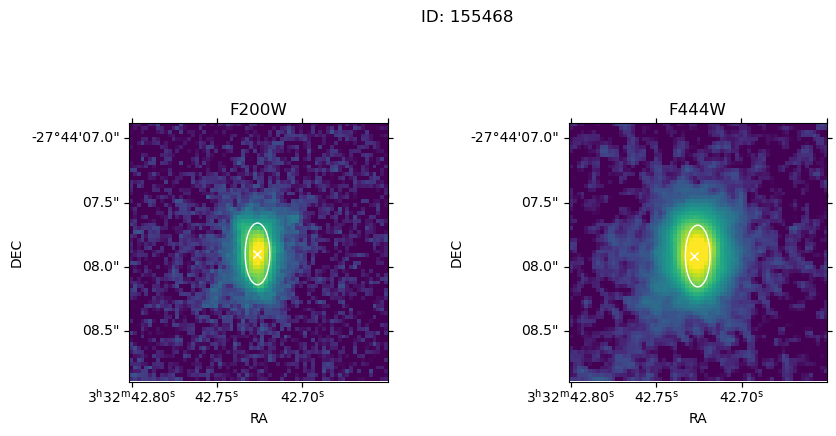

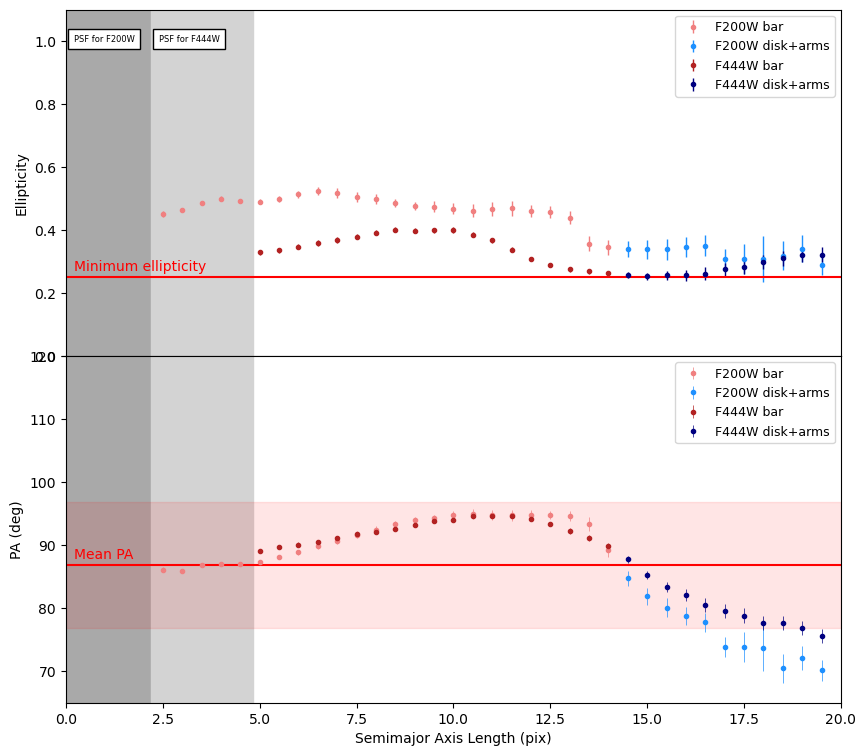

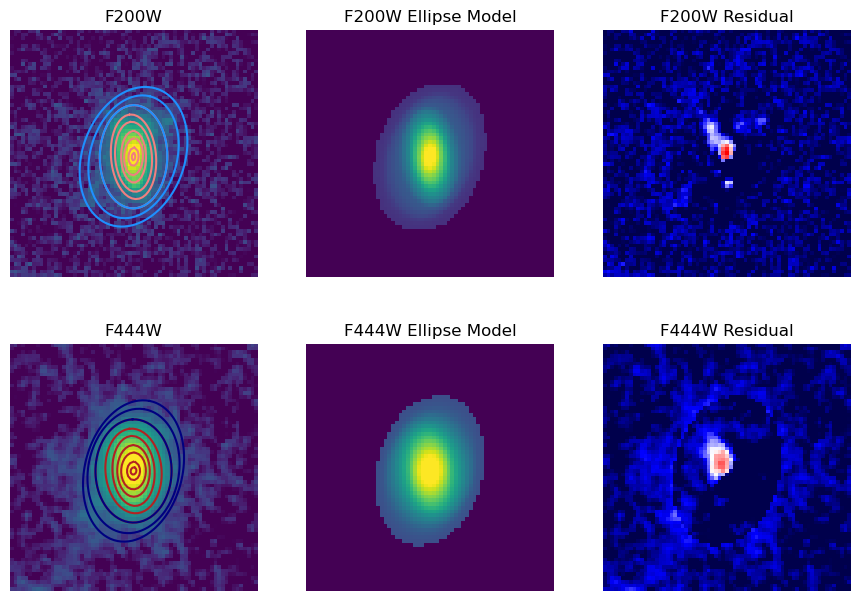

In [31]:
with PdfPages(res_dir+f'{gal}_isophotal_analysis.pdf') as pdf:

    #FIRST PAGE: Galaxy in F200W and F444W filters with initial ellipse guess to fit
        
    #Plotting the second initial ellipse guess:
            
    #normalization of both images:
    img_max_F200W=0.6*np.max(data_F200W)
    img_max_F444W=0.6*np.max(data_F444W)
    norm_F200W = simple_norm(data_F200W, 'log', log_a=70, min_cut=0, max_cut=img_max_F200W)
    norm_F444W = simple_norm(data_F444W, 'log', log_a=70, min_cut=0, max_cut=img_max_F444W)
        
    #plotting:
    fig=plt.figure(figsize=(9, 5))
    fig.suptitle(f'ID: {gal}')
    plt.subplots_adjust(hspace=0, wspace=0.7)
        
    plt.subplot(1, 2, 1, projection=coord)
    plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    plt.title("F200W")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    aper_2.plot(color='white')
    plt.plot(x0_F200W, y0_F200W, color='white', marker='x')
        
    plt.subplot(1, 2, 2, projection=coord)
    plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    plt.title("F444W")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    aper.plot(color='white')
    plt.plot(x0_F444W, y0_F444W, color='white', marker='x')
        
    pdf.savefig(bbox_inches="tight")

        
    #SECOND PAGE: Graphs on semimajor axis vs ellipticity and semimajor axis vs position angle
        
    plt.figure(figsize=(10, 9))
    plt.subplots_adjust(hspace=0, wspace=0.35)

    #conditions for bar and disk limits: 
    bar_F200W=(isolist_F200W.sma>minsma_F200W) & (isolist_F200W.sma<=smabreak)
    disk_F200W=isolist_F200W.sma>smabreak
    bar_F444W=(isolist_F444W.sma>minsma_F444W) & (isolist_F444W.sma<=smabreak)
    disk_F444W=isolist_F444W.sma>smabreak
        
    plt.subplot(2, 1, 1)
    plt.errorbar(isolist_F200W.sma[bar_F200W], isolist_F200W.eps[bar_F200W], 
                 yerr=isolist_F200W.ellip_err[bar_F200W], 
                 fmt='o', elinewidth=1, markersize=3, color='lightcoral', label='F200W bar')
    plt.errorbar(isolist_F200W.sma[disk_F200W], isolist_F200W.eps[disk_F200W], 
                 yerr=isolist_F200W.ellip_err[disk_F200W], 
                 fmt='o', elinewidth=1, markersize=3, color='dodgerblue', label='F200W disk+arms')
    plt.errorbar(isolist_F444W.sma[bar_F444W], isolist_F444W.eps[bar_F444W], 
                 yerr=isolist_F444W.ellip_err[bar_F444W], 
                 fmt='o', elinewidth=1, markersize=3, color='firebrick', label='F444W bar')
    plt.errorbar(isolist_F444W.sma[disk_F444W], isolist_F444W.eps[disk_F444W], 
                 yerr=isolist_F444W.ellip_err[disk_F444W], 
                 fmt='o', elinewidth=1, markersize=3, color='navy', label='F444W disk+arms')
    plt.ylabel('Ellipticity')
    plt.legend(fontsize=9)
    
    #lines and aspect of plot:
    plt.xticks([])
    plt.hlines(y=0.25, xmin=0, xmax=maxsma, colors='red')
    plt.ylim(0,1.1)
    plt.xlim(xmin=0,xmax=maxsma)
    plt.fill_betweenx(y=(0,1.1), x1=0, x2=minsma_F200W, color='darkgrey')
    plt.fill_betweenx(y=(0,1.1), x1=minsma_F200W, x2=minsma_F444W, color='lightgrey')
    plt.text(x=0.2, y=0.27, s='Minimum ellipticity', color='red')
    box_props = dict(facecolor='white', edgecolor='black')
    plt.text(x=0.2,y=1,s='PSF for F200W', bbox=box_props, fontsize=6)
    plt.text(x=minsma_F200W+0.2,y=1,s='PSF for F444W', bbox=box_props, fontsize=6)

        
    plt.subplot(2, 1, 2)
    plt.errorbar(isolist_F200W.sma[bar_F200W], isolist_F200W.pa[bar_F200W]/np.pi*180.0, 
                 yerr=isolist_F200W.pa_err[bar_F200W]/np.pi*80.0, fmt='o', color='lightcoral', 
                 elinewidth=0.5, markersize=3, label='F200W bar')
    plt.errorbar(isolist_F200W.sma[disk_F200W], isolist_F200W.pa[disk_F200W]/np.pi*180.0, 
                 yerr=isolist_F200W.pa_err[disk_F200W]/np.pi*80.0, fmt='o', color='dodgerblue', 
                 elinewidth=0.5, markersize=3, label='F200W disk+arms')
    plt.errorbar(isolist_F444W.sma[bar_F444W], isolist_F444W.pa[bar_F444W]/np.pi*180.0, 
                 yerr=isolist_F444W.pa_err[bar_F444W]/np.pi*80.0, fmt='o', color='firebrick', 
                 elinewidth=0.5, markersize=3, label='F444W bar')
    plt.errorbar(isolist_F444W.sma[disk_F444W], isolist_F444W.pa[disk_F444W]/np.pi*180.0, 
                 yerr=isolist_F444W.pa_err[disk_F444W]/np.pi*80.0, fmt='o', color='navy', elinewidth=0.5, 
                 markersize=3, label='F444W disk+arms')
    plt.xlabel('Semimajor Axis Length (pix)')
    plt.ylabel('PA (deg)')
    plt.legend(fontsize=9)

    #lines and aspect of plot:
    plt.ylim(ymin_PA,ymax_PA)
    plt.xlim(xmin=0,xmax=maxsma)
    plt.fill_betweenx(y=(ymin_PA,ymax_PA), x1=0, x2=minsma_F200W, color='darkgrey')
    plt.fill_betweenx(y=(ymin_PA,ymax_PA), x1=minsma_F200W, x2=minsma_F444W, color='lightgrey')
    ymean=np.mean(isolist_F200W.pa/np.pi*180.0)
    ymean2=np.mean(isolist_F444W.pa/np.pi*180.0)
    ymean_t=np.mean((ymean,ymean2))
    plt.text(x=0.2, y=ymean_t+1, s='Mean PA', color='red')
    plt.hlines(y=ymean_t, xmin=0, xmax=maxsma, colors='red')
    plt.fill_between(x=(0,maxsma), y1=ymean_t-10, y2=ymean_t+10, color='red', alpha=0.1)


        
    pdf.savefig(bbox_inches="tight")

        
    #THIRD PAGE: data, model and residuals

    #models and residuals:
    model_image_F200W = build_ellipse_model(data_F200W.shape, isolist_F200W)
    residual_F200W = data_F200W - model_image_F200W
    model_image_F444W = build_ellipse_model(data_F444W.shape, isolist_F444W)
    residual_F444W = data_F444W - model_image_F444W
        
    fig, axs = plt.subplots(figsize=(6, 6), nrows=2, ncols=3)
    fig.subplots_adjust(left=0.1, right=1.5, bottom=0.02, top=0.98)
        
    axs[0][0].imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    axs[0][0].set_title('F200W')
    axs[0][0].axis('off')
        
    smas = np.linspace(0.5, smabreak, int(smabreak/2))
    for sma in smas:
        iso_F200W = isolist_F200W.get_closest(sma)
        x_F200W, y_F200W, = iso_F200W.sampled_coordinates()
        axs[0][0].plot(x_F200W, y_F200W, color='lightcoral')
    smas = np.linspace(smabreak, maxsma, int((maxsma-smabreak)/2))
    for sma in smas:
        iso_F200W = isolist_F200W.get_closest(sma)
        x_F200W, y_F200W, = iso_F200W.sampled_coordinates()
        axs[0][0].plot(x_F200W, y_F200W, color='dodgerblue')
        
    axs[0][1].imshow(model_image_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    axs[0][1].set_title('F200W Ellipse Model')
    axs[0][1].axis('off')
        
    axs[0][2].imshow(residual_F200W, origin='lower',norm=norm_F200W, cmap='seismic')
    axs[0][2].set_title('F200W Residual')
    axs[0][2].axis('off')
        
    axs[1][0].imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    axs[1][0].set_title('F444W')
    axs[1][0].axis('off')
        
    smas = np.linspace(0.5, smabreak, int(smabreak/2))
    for sma in smas:
        iso_F444W = isolist_F444W.get_closest(sma)
        x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
        axs[1][0].plot(x_F444W, y_F444W, color='firebrick')
    smas = np.linspace(smabreak, maxsma, int((maxsma-smabreak)/2))
    for sma in smas:
        iso_F444W = isolist_F444W.get_closest(sma)
        x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
        axs[1][0].plot(x_F444W, y_F444W, color='navy')
        
    axs[1][1].imshow(model_image_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    axs[1][1].set_title('F444W Ellipse Model')
    axs[1][1].axis('off')
        
    axs[1][2].imshow(residual_F444W, origin='lower',norm=norm_F444W, cmap='seismic')
    axs[1][2].set_title('F444W Residual')
    axs[1][2].axis('off')

        
    pdf.savefig(bbox_inches="tight")

## 3.5. ID: 210751

In [32]:
#some parameters that are different for each galaxy:
n=4             #this must me equal to ID-1
gal=gal_list[n] #galaxy ID
maxsma=20       #maximum semimajor axis
sma0=7         #value from which to interpolate sma
smabreak=12     #sma value where isophotes change from bar to arms+disk
ymin_PA=70       #minimum position angle in plot
ymax_PA=135      #maximum position angle in plot

#guesses for the updated geometry of the galaxy:
sma=10
eps=0.6
pa=90 #degrees

In [33]:
#galaxy in both filters:
image_F200W=cuts_dir_F200W+f"{gal}_cutout.fits"
image_F444W=cuts_dir_F444W+f"{gal}_cutout.fits"
hdu_image_F200W=fits.open(image_F200W)
hdu_image_F444W=fits.open(image_F444W)
data_F200W=hdu_image_F200W[1].data
data_F444W=hdu_image_F444W[1].data
        
#coordinates for the image:
coord=WCS(hdu_image_F200W[1].header)


ellipse_F444W = Ellipse(data_F444W, geometry[n])
isolist_F444W = ellipse_F444W.fit_image(fix_center = False, linear=True)

ellipse_F200W = Ellipse(data_F200W, geometry[n])
isolist_F200W = ellipse_F200W.fit_image(fix_center = False, linear=True)
##fix_center is False because we're analyzing how it changes to find the best center

#geometry centers:
x0_F200W=np.mean(isolist_F200W.x0)
y0_F200W=np.mean(isolist_F200W.y0)
x0_F444W=np.mean(isolist_F444W.x0)
y0_F444W=np.mean(isolist_F444W.y0)

#updating geometry:
geometry_2=EllipseGeometry(x0=x0_F444W, y0=y0_F444W, sma=sma, eps=eps, pa=pa * np.pi / 180.0)
new_geometry_2=EllipseGeometry(x0=x0_F200W, y0=y0_F200W, sma=sma, eps=eps, pa=pa * np.pi / 180.0)

#updating apertures:
aper = EllipticalAperture((geometry_2.x0, geometry_2.y0), geometry_2.sma, 
                              geometry_2.sma*(1-geometry_2.eps), geometry_2.pa)
aper_2 = EllipticalAperture((new_geometry_2.x0, new_geometry_2.y0), new_geometry_2.sma, 
                              new_geometry_2.sma*(1-new_geometry_2.eps), new_geometry_2.pa)

#final ellipse fit:
ellipse_F200W = Ellipse(data_F200W, geometry_2)
isolist_F200W = ellipse_F200W.fit_image(fix_center = True, linear=True, minsma=0.5, 
                maxsma=maxsma, conver=0.01, maxgerr=0.95, step=0.5, sma0=sma0)
        
ellipse_F444W = Ellipse(data_F444W, geometry_2)
isolist_F444W = ellipse_F444W.fit_image(fix_center = True, linear=True, minsma=0.5, 
                maxsma=maxsma, conver=0.01, maxgerr=0.95, step=0.5, sma0=sma0)

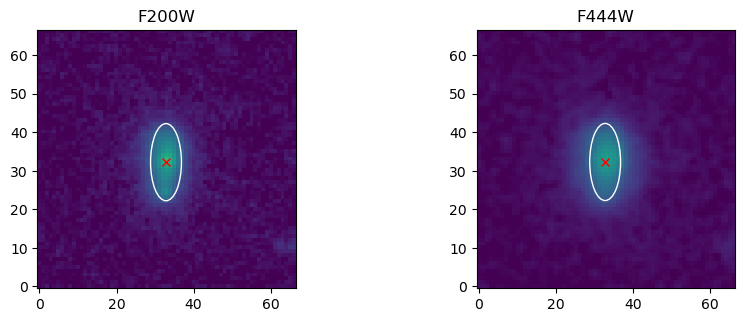

In [34]:
norm_F200W = simple_norm(data_F200W, 'log', log_a=500, min_cut=-0.001, max_cut=5)
norm_F444W = simple_norm(data_F444W, 'log', log_a=500, min_cut=-0.001, max_cut=5)

#plotting:
fig=plt.figure(figsize=(9, 5))
plt.subplots_adjust(hspace=0, wspace=0.7)
        
plt.subplot(1, 2, 1)
plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
plt.title("F200W")
plt.plot(x0_F200W, y0_F200W, color='red', marker='x')
aper_2.plot(color='white')

        
plt.subplot(1, 2, 2)
plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
plt.title("F444W")
plt.plot(x0_F444W, y0_F444W, color='red', marker='x')
aper.plot(color='white')

plt.show()

In [35]:
print(isolist_F200W.stop_code)
print(isolist_F444W.stop_code)

[0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2.]


Good fit.

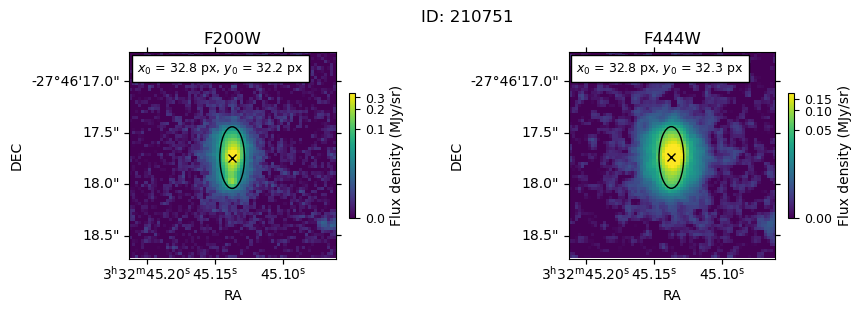

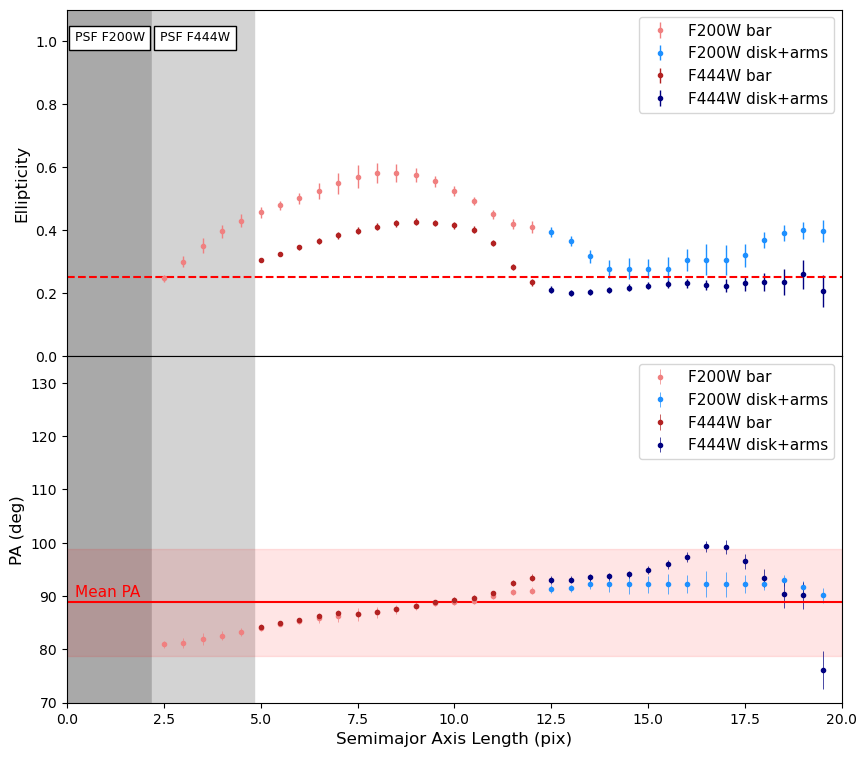

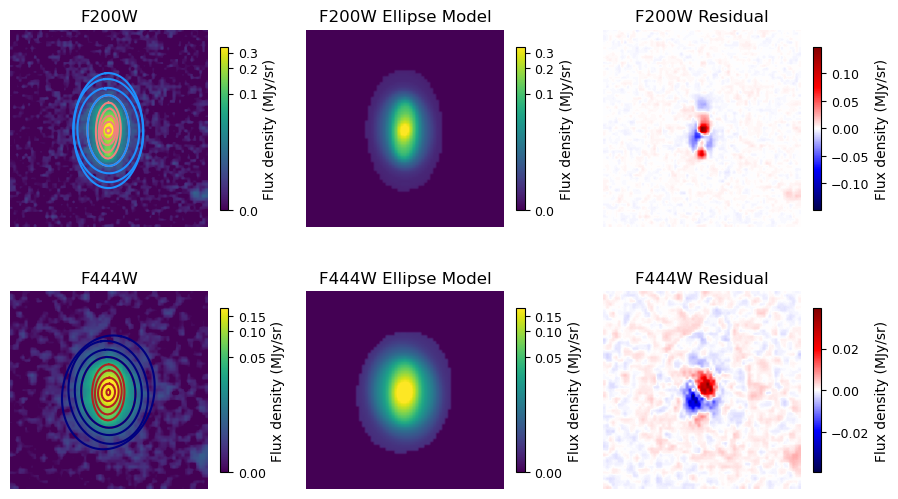

In [36]:
with PdfPages(res_dir+f'{gal}_isophotal_analysis.pdf') as pdf:

    #FIRST PAGE: Galaxy in F200W and F444W filters with initial ellipse guess to fit
        
    #Plotting the second initial ellipse guess:
        
    #normalization of both images:
    img_max_F200W=0.6*np.max(data_F200W)
    img_max_F444W=0.6*np.max(data_F444W)
    norm_F200W = simple_norm(data_F200W, 'log', log_a=70, min_cut=0, max_cut=img_max_F200W)
    norm_F444W = simple_norm(data_F444W, 'log', log_a=70, min_cut=0, max_cut=img_max_F444W)
        
    #plotting:
    fig=plt.figure(figsize=(9, 3))
    fig.suptitle(f'ID: {gal}')
    plt.subplots_adjust(hspace=0, wspace=0.7)

    box_props = dict(facecolor='white', edgecolor='black')
    
    plt.subplot(1, 2, 1, projection=coord)
    plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    cbar=plt.colorbar(shrink=0.54, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    plt.title("F200W")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    aper_2.plot(color='k')
    plt.plot(x0_F200W, y0_F200W, color='k', marker='x')
    plt.text(x=2,y=60,s=r'$x_0$ = {:.1f} px, $y_0$ = {:.1f} px'.format(x0_F200W, y0_F200W), 
             bbox=box_props, fontsize=9)
        
    plt.subplot(1, 2, 2, projection=coord)
    plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    cbar=plt.colorbar(shrink=0.54, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    plt.title("F444W")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    aper.plot(color='k')
    plt.plot(x0_F444W, y0_F444W, color='k', marker='x')
    plt.text(x=2,y=60,s=r'$x_0$ = {:.1f} px, $y_0$ = {:.1f} px'.format(x0_F444W, y0_F444W), 
             bbox=box_props, fontsize=9)
        
    pdf.savefig(bbox_inches="tight")

        
    #SECOND PAGE: Graphs on semimajor axis vs ellipticity and semimajor axis vs position angle
        
    plt.figure(figsize=(10, 9))
    plt.subplots_adjust(hspace=0, wspace=0.35)

    #conditions for bar and disk limits: 
    bar_F200W=(isolist_F200W.sma>minsma_F200W) & (isolist_F200W.sma<=smabreak)
    disk_F200W=isolist_F200W.sma>smabreak
    bar_F444W=(isolist_F444W.sma>minsma_F444W) & (isolist_F444W.sma<=smabreak)
    disk_F444W=isolist_F444W.sma>smabreak

        
    plt.subplot(2, 1, 1)
    plt.errorbar(isolist_F200W.sma[bar_F200W], isolist_F200W.eps[bar_F200W], 
                 yerr=isolist_F200W.ellip_err[bar_F200W], 
                 fmt='o', elinewidth=1, markersize=3, color='lightcoral', label='F200W bar')
    plt.errorbar(isolist_F200W.sma[disk_F200W], isolist_F200W.eps[disk_F200W], 
                 yerr=isolist_F200W.ellip_err[disk_F200W], 
                 fmt='o', elinewidth=1, markersize=3, color='dodgerblue', label='F200W disk+arms')
    plt.errorbar(isolist_F444W.sma[bar_F444W], isolist_F444W.eps[bar_F444W], 
                 yerr=isolist_F444W.ellip_err[bar_F444W], 
                 fmt='o', elinewidth=1, markersize=3, color='firebrick', label='F444W bar')
    plt.errorbar(isolist_F444W.sma[disk_F444W], isolist_F444W.eps[disk_F444W], 
                 yerr=isolist_F444W.ellip_err[disk_F444W], 
                 fmt='o', elinewidth=1, markersize=3, color='navy', label='F444W disk+arms')
    plt.ylabel('Ellipticity', fontsize=12)
    plt.legend(fontsize=11)
    
    #lines and aspect of plot:
    plt.xticks([])
    plt.hlines(y=0.25, xmin=0, xmax=maxsma, colors='red', linestyles='dashed')
    plt.ylim(0,1.1)
    plt.xlim(xmin=0,xmax=maxsma)
    plt.fill_betweenx(y=(0,1.1), x1=0, x2=minsma_F200W, color='darkgrey')
    plt.fill_betweenx(y=(0,1.1), x1=minsma_F200W, x2=minsma_F444W, color='lightgrey')
    plt.text(x=0.2,y=1,s='PSF F200W', bbox=box_props, fontsize=9)
    plt.text(x=minsma_F200W+0.2,y=1,s='PSF F444W', bbox=box_props, fontsize=9)

        
    plt.subplot(2, 1, 2)
    plt.errorbar(isolist_F200W.sma[bar_F200W], isolist_F200W.pa[bar_F200W]/np.pi*180.0, 
                 yerr=isolist_F200W.pa_err[bar_F200W]/np.pi*80.0, fmt='o', color='lightcoral', 
                 elinewidth=0.5, markersize=3, label='F200W bar')
    plt.errorbar(isolist_F200W.sma[disk_F200W], isolist_F200W.pa[disk_F200W]/np.pi*180.0, 
                 yerr=isolist_F200W.pa_err[disk_F200W]/np.pi*80.0, fmt='o', color='dodgerblue', 
                 elinewidth=0.5, markersize=3, label='F200W disk+arms')
    plt.errorbar(isolist_F444W.sma[bar_F444W], isolist_F444W.pa[bar_F444W]/np.pi*180.0, 
                 yerr=isolist_F444W.pa_err[bar_F444W]/np.pi*80.0, fmt='o', color='firebrick', 
                 elinewidth=0.5, markersize=3, label='F444W bar')
    plt.errorbar(isolist_F444W.sma[disk_F444W], isolist_F444W.pa[disk_F444W]/np.pi*180.0, 
                 yerr=isolist_F444W.pa_err[disk_F444W]/np.pi*80.0, fmt='o', color='navy', elinewidth=0.5, 
                 markersize=3, label='F444W disk+arms')
    plt.xlabel('Semimajor Axis Length (pix)', fontsize=12)
    plt.ylabel('PA (deg)', fontsize=12)
    plt.legend(fontsize=11)

    #lines and aspect of plot:
    plt.ylim(ymin_PA,ymax_PA)
    plt.xlim(xmin=0,xmax=maxsma)
    plt.fill_betweenx(y=(ymin_PA,ymax_PA), x1=0, x2=minsma_F200W, color='darkgrey')
    plt.fill_betweenx(y=(ymin_PA,ymax_PA), x1=minsma_F200W, x2=minsma_F444W, color='lightgrey')
    ymean=np.mean(isolist_F200W.pa/np.pi*180.0)
    ymean2=np.mean(isolist_F444W.pa/np.pi*180.0)
    ymean_t=np.mean((ymean,ymean2))
    plt.text(x=0.2, y=ymean_t+1, s='Mean PA', color='red', fontsize=11)
    plt.hlines(y=ymean_t, xmin=0, xmax=maxsma, colors='red')
    plt.fill_between(x=(0,maxsma), y1=ymean_t-10, y2=ymean_t+10, color='red', alpha=0.1)


        
    pdf.savefig(bbox_inches="tight")

        
    #THIRD PAGE: data, model and residuals

    #models and residuals:
    model_image_F200W = build_ellipse_model(data_F200W.shape, isolist_F200W)
    residual_F200W = data_F200W - model_image_F200W
    model_image_F444W = build_ellipse_model(data_F444W.shape, isolist_F444W)
    residual_F444W = data_F444W - model_image_F444W
        
    fig, axs = plt.subplots(figsize=(6, 5), nrows=2, ncols=3)
    fig.subplots_adjust(left=0.1, right=1.5, bottom=0.02, top=0.98)
        
    im=axs[0][0].imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    cbar=fig.colorbar(im, ax=axs[0][0], shrink=0.75, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    axs[0][0].set_title('F200W')
    axs[0][0].axis('off')
        
    smas = np.linspace(0.5, smabreak, int(smabreak/2))
    for sma in smas:
        iso_F200W = isolist_F200W.get_closest(sma)
        x_F200W, y_F200W, = iso_F200W.sampled_coordinates()
        axs[0][0].plot(x_F200W, y_F200W, color='lightcoral')
    smas = np.linspace(smabreak, maxsma, int((maxsma-smabreak)/2))
    for sma in smas:
        iso_F200W = isolist_F200W.get_closest(sma)
        x_F200W, y_F200W, = iso_F200W.sampled_coordinates()
        axs[0][0].plot(x_F200W, y_F200W, color='dodgerblue')
        
    im=axs[0][1].imshow(model_image_F200W, origin='lower', norm=norm_F200W, cmap='viridis')
    cbar=fig.colorbar(im, ax=axs[0][1], shrink=0.75, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    axs[0][1].set_title('F200W Ellipse Model')
    axs[0][1].axis('off')
        
    im=axs[0][2].imshow(residual_F200W, norm=CenteredNorm(), origin='lower', cmap='seismic')
    cbar=fig.colorbar(im, ax=axs[0][2], shrink=0.75, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    axs[0][2].set_title('F200W Residual')
    axs[0][2].axis('off')
        
    im=axs[1][0].imshow(data_F444W, norm=norm_F444W, origin='lower', cmap='viridis')
    cbar=fig.colorbar(im, ax=axs[1][0], shrink=0.75, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    axs[1][0].set_title('F444W')
    axs[1][0].axis('off')
        
    smas = np.linspace(0.5, smabreak, int(smabreak/2))
    for sma in smas:
        iso_F444W = isolist_F444W.get_closest(sma)
        x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
        axs[1][0].plot(x_F444W, y_F444W, color='firebrick')
    smas = np.linspace(smabreak, maxsma, int((maxsma-smabreak)/2))
    for sma in smas:
        iso_F444W = isolist_F444W.get_closest(sma)
        x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
        axs[1][0].plot(x_F444W, y_F444W, color='navy')
        
    im=axs[1][1].imshow(model_image_F444W, norm=norm_F444W, origin='lower', cmap='viridis')
    cbar=fig.colorbar(im, ax=axs[1][1], shrink=0.75, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    axs[1][1].set_title('F444W Ellipse Model')
    axs[1][1].axis('off')
        
    im=axs[1][2].imshow(residual_F444W, norm=CenteredNorm(), origin='lower', cmap='seismic')
    cbar=fig.colorbar(im, ax=axs[1][2], shrink=0.75, label='Flux density (MJy/sr)')
    cbar.ax.tick_params(labelsize=9)
    axs[1][2].set_title('F444W Residual')
    axs[1][2].axis('off')

        
    pdf.savefig(bbox_inches="tight")

## 3.6. ID: 82863 

In [37]:
#some parameters that are different for each galaxy:
n=5             #this must me equal to ID-1
gal=gal_list[n] #galaxy ID
maxsma=16       #maximum semimajor axis
sma0=5         #value from which to interpolate sma
smabreak=12     #sma value where isophotes change from bar to arms+disk
ymin_PA=50       #minimum position angle in plot
ymax_PA=150      #maximum position angle in plot

#guesses for the updated geometry of the galaxy:
sma=10
eps=0.6
pa=90 #degrees

In [38]:
#galaxy in both filters:
image_F200W=cuts_dir_F200W+f"{gal}_cutout.fits"
image_F444W=cuts_dir_F444W+f"{gal}_cutout.fits"
hdu_image_F200W=fits.open(image_F200W)
hdu_image_F444W=fits.open(image_F444W)
data_F200W=hdu_image_F200W[1].data
data_F444W=hdu_image_F444W[1].data
        
#coordinates for the image:
coord=WCS(hdu_image_F200W[1].header)


ellipse_F444W = Ellipse(data_F444W, geometry[n])
isolist_F444W = ellipse_F444W.fit_image(fix_center = False, linear=True)

ellipse_F200W = Ellipse(data_F200W, geometry[n])
isolist_F200W = ellipse_F200W.fit_image(fix_center = False, linear=True)
##fix_center is False because we're analyzing how it changes to find the best center

#geometry centers:
x0_F200W=np.mean(isolist_F200W.x0)
y0_F200W=np.mean(isolist_F200W.y0)
x0_F444W=np.mean(isolist_F444W.x0)
y0_F444W=np.mean(isolist_F444W.y0)

#updating geometry:
geometry_2=EllipseGeometry(x0=x0_F444W, y0=y0_F444W, sma=sma, eps=eps, pa=pa * np.pi / 180.0)
new_geometry_2=EllipseGeometry(x0=x0_F200W, y0=y0_F200W, sma=sma, eps=eps, pa=pa * np.pi / 180.0)

#updating apertures:
aper = EllipticalAperture((geometry_2.x0, geometry_2.y0), geometry_2.sma, 
                              geometry_2.sma*(1-geometry_2.eps), geometry_2.pa)
aper_2 = EllipticalAperture((new_geometry_2.x0, new_geometry_2.y0), new_geometry_2.sma, 
                              new_geometry_2.sma*(1-new_geometry_2.eps), new_geometry_2.pa)

#final ellipse fit:
ellipse_F200W = Ellipse(data_F200W, geometry_2)
isolist_F200W = ellipse_F200W.fit_image(fix_center = True, linear=True, minsma=0.5, 
                maxsma=maxsma, conver=0.01, maxgerr=0.95, step=0.5, sma0=sma0)
        
ellipse_F444W = Ellipse(data_F444W, geometry_2)
isolist_F444W = ellipse_F444W.fit_image(fix_center = True, linear=True, minsma=0.5, 
                maxsma=maxsma, conver=0.01, maxgerr=0.95, step=0.5, sma0=sma0)

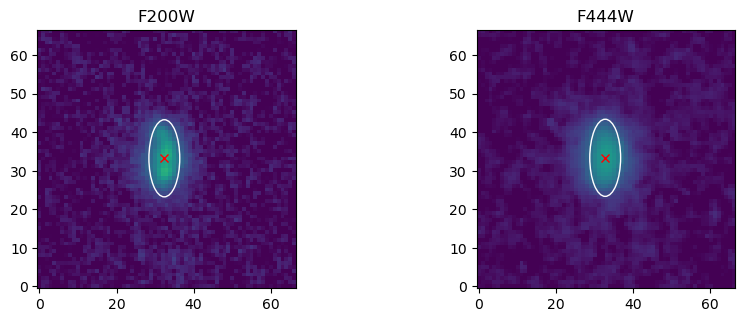

In [39]:
norm_F200W = simple_norm(data_F200W, 'log', log_a=500, min_cut=-0.001, max_cut=5)
norm_F444W = simple_norm(data_F444W, 'log', log_a=500, min_cut=-0.001, max_cut=5)

#plotting:
fig=plt.figure(figsize=(9, 5))
plt.subplots_adjust(hspace=0, wspace=0.7)
        
plt.subplot(1, 2, 1)
plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
plt.title("F200W")
plt.plot(x0_F200W, y0_F200W, color='red', marker='x')
aper_2.plot(color='white')

        
plt.subplot(1, 2, 2)
plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
plt.title("F444W")
plt.plot(x0_F444W, y0_F444W, color='red', marker='x')
aper.plot(color='white')

plt.show()

In [40]:
print(isolist_F200W.stop_code)
print(isolist_F444W.stop_code)

[0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.
 2. 0. 0. 0. 0. 2.]
[0. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


Good fit.

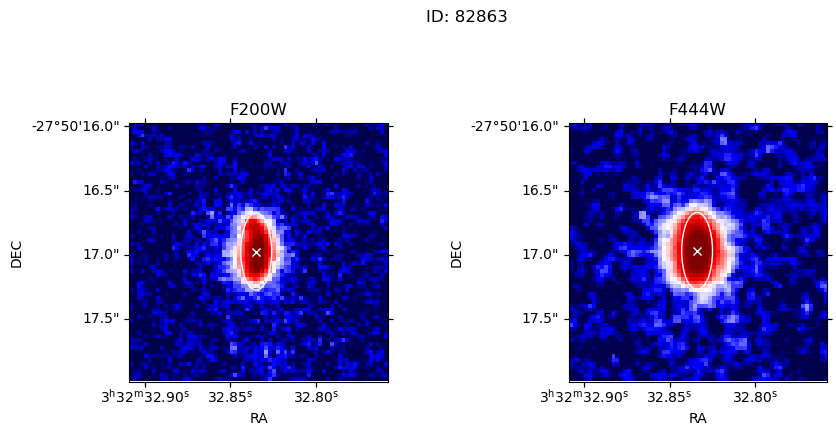

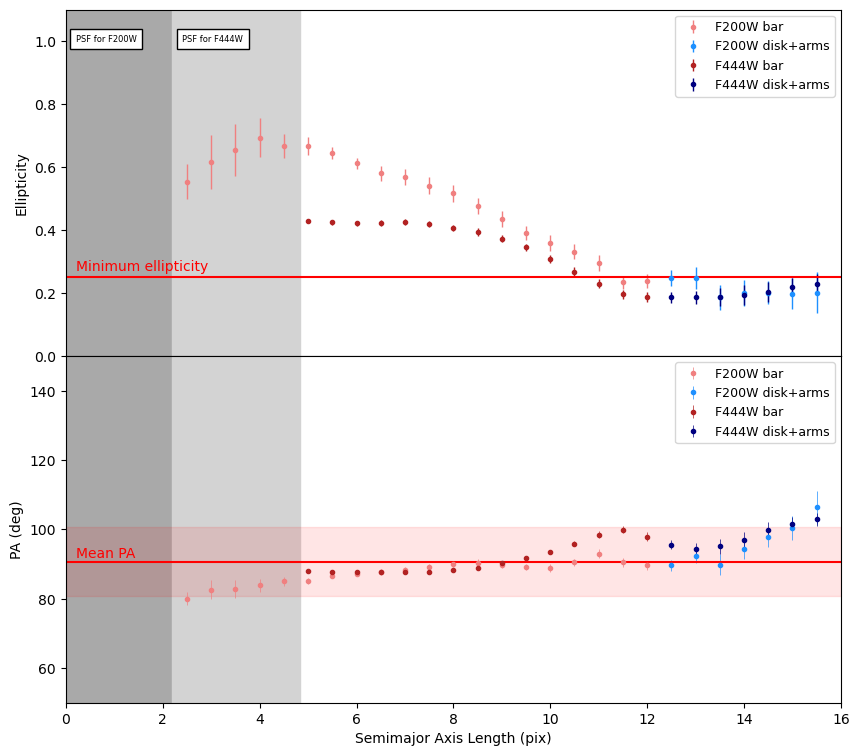

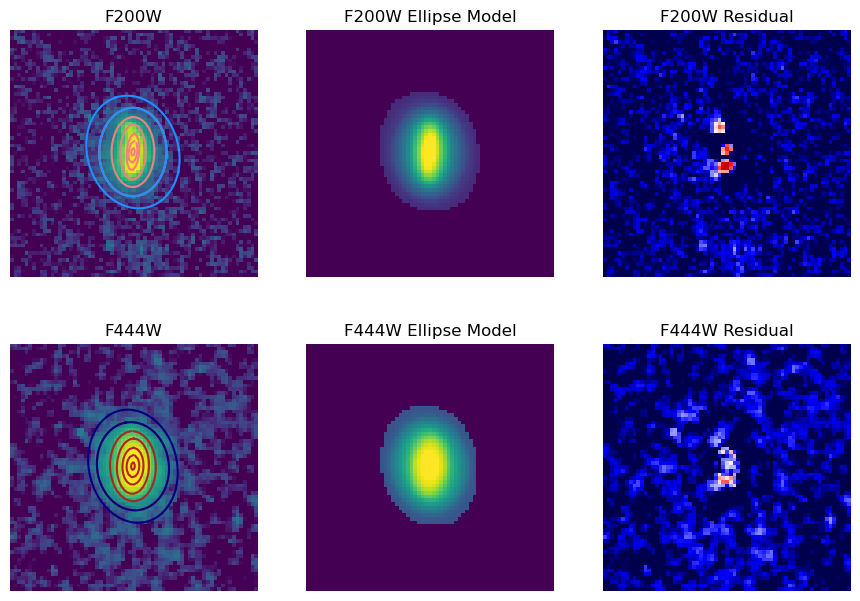

In [41]:
with PdfPages(res_dir+f'{gal}_isophotal_analysis.pdf') as pdf:

    #FIRST PAGE: Galaxy in F200W and F444W filters with initial ellipse guess to fit
        
    #Plotting the second initial ellipse guess:
        
    #normalization of both images:
    img_max_F200W=0.6*np.max(data_F200W)
    img_max_F444W=0.6*np.max(data_F444W)
    norm_F200W = simple_norm(data_F200W, 'log', log_a=70, min_cut=0, max_cut=img_max_F200W)
    norm_F444W = simple_norm(data_F444W, 'log', log_a=70, min_cut=0, max_cut=img_max_F444W)
        
    #plotting:
    fig=plt.figure(figsize=(9, 5))
    fig.suptitle(f'ID: {gal}')
    plt.subplots_adjust(hspace=0, wspace=0.7)
        
    plt.subplot(1, 2, 1, projection=coord)
    plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='seismic')
    plt.title("F200W")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    aper_2.plot(color='white')
    plt.plot(x0_F200W, y0_F200W, color='white', marker='x')
        
    plt.subplot(1, 2, 2, projection=coord)
    plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='seismic')
    plt.title("F444W")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    aper.plot(color='white')
    plt.plot(x0_F444W, y0_F444W, color='white', marker='x')
        
    pdf.savefig(bbox_inches="tight")

        
    #SECOND PAGE: Graphs on semimajor axis vs ellipticity and semimajor axis vs position angle
        
    plt.figure(figsize=(10, 9))
    plt.subplots_adjust(hspace=0, wspace=0.35)

    #conditions for bar and disk limits: 
    bar_F200W=(isolist_F200W.sma>minsma_F200W) & (isolist_F200W.sma<=smabreak)
    disk_F200W=isolist_F200W.sma>smabreak
    bar_F444W=(isolist_F444W.sma>minsma_F444W) & (isolist_F444W.sma<=smabreak)
    disk_F444W=isolist_F444W.sma>smabreak
        
    plt.subplot(2, 1, 1)
    plt.errorbar(isolist_F200W.sma[bar_F200W], isolist_F200W.eps[bar_F200W], 
                 yerr=isolist_F200W.ellip_err[bar_F200W], 
                 fmt='o', elinewidth=1, markersize=3, color='lightcoral', label='F200W bar')
    plt.errorbar(isolist_F200W.sma[disk_F200W], isolist_F200W.eps[disk_F200W], 
                 yerr=isolist_F200W.ellip_err[disk_F200W], 
                 fmt='o', elinewidth=1, markersize=3, color='dodgerblue', label='F200W disk+arms')
    plt.errorbar(isolist_F444W.sma[bar_F444W], isolist_F444W.eps[bar_F444W], 
                 yerr=isolist_F444W.ellip_err[bar_F444W], 
                 fmt='o', elinewidth=1, markersize=3, color='firebrick', label='F444W bar')
    plt.errorbar(isolist_F444W.sma[disk_F444W], isolist_F444W.eps[disk_F444W], 
                 yerr=isolist_F444W.ellip_err[disk_F444W], 
                 fmt='o', elinewidth=1, markersize=3, color='navy', label='F444W disk+arms')
    plt.ylabel('Ellipticity')
    plt.legend(fontsize=9)
    
    #lines and aspect of plot:
    plt.xticks([])
    plt.hlines(y=0.25, xmin=0, xmax=maxsma, colors='red')
    plt.ylim(0,1.1)
    plt.xlim(xmin=0,xmax=maxsma)
    plt.fill_betweenx(y=(0,1.1), x1=0, x2=minsma_F200W, color='darkgrey')
    plt.fill_betweenx(y=(0,1.1), x1=minsma_F200W, x2=minsma_F444W, color='lightgrey')
    plt.text(x=0.2, y=0.27, s='Minimum ellipticity', color='red')
    box_props = dict(facecolor='white', edgecolor='black')
    plt.text(x=0.2,y=1,s='PSF for F200W', bbox=box_props, fontsize=6)
    plt.text(x=minsma_F200W+0.2,y=1,s='PSF for F444W', bbox=box_props, fontsize=6)

        
    plt.subplot(2, 1, 2)
    plt.errorbar(isolist_F200W.sma[bar_F200W], isolist_F200W.pa[bar_F200W]/np.pi*180.0, 
                 yerr=isolist_F200W.pa_err[bar_F200W]/np.pi*80.0, fmt='o', color='lightcoral', 
                 elinewidth=0.5, markersize=3, label='F200W bar')
    plt.errorbar(isolist_F200W.sma[disk_F200W], isolist_F200W.pa[disk_F200W]/np.pi*180.0, 
                 yerr=isolist_F200W.pa_err[disk_F200W]/np.pi*80.0, fmt='o', color='dodgerblue', 
                 elinewidth=0.5, markersize=3, label='F200W disk+arms')
    plt.errorbar(isolist_F444W.sma[bar_F444W], isolist_F444W.pa[bar_F444W]/np.pi*180.0, 
                 yerr=isolist_F444W.pa_err[bar_F444W]/np.pi*80.0, fmt='o', color='firebrick', 
                 elinewidth=0.5, markersize=3, label='F444W bar')
    plt.errorbar(isolist_F444W.sma[disk_F444W], isolist_F444W.pa[disk_F444W]/np.pi*180.0, 
                 yerr=isolist_F444W.pa_err[disk_F444W]/np.pi*80.0, fmt='o', color='navy', elinewidth=0.5, 
                 markersize=3, label='F444W disk+arms')
    plt.xlabel('Semimajor Axis Length (pix)')
    plt.ylabel('PA (deg)')
    plt.legend(fontsize=9)

    #lines and aspect of plot:
    plt.ylim(ymin_PA,ymax_PA)
    plt.xlim(xmin=0,xmax=maxsma)
    plt.fill_betweenx(y=(ymin_PA,ymax_PA), x1=0, x2=minsma_F200W, color='darkgrey')
    plt.fill_betweenx(y=(ymin_PA,ymax_PA), x1=minsma_F200W, x2=minsma_F444W, color='lightgrey')
    ymean=np.mean(isolist_F200W.pa/np.pi*180.0)
    ymean2=np.mean(isolist_F444W.pa/np.pi*180.0)
    ymean_t=np.mean((ymean,ymean2))
    plt.text(x=0.2, y=ymean_t+1, s='Mean PA', color='red')
    plt.hlines(y=ymean_t, xmin=0, xmax=maxsma, colors='red')
    plt.fill_between(x=(0,maxsma), y1=ymean_t-10, y2=ymean_t+10, color='red', alpha=0.1)


        
    pdf.savefig(bbox_inches="tight")

        
    #THIRD PAGE: data, model and residuals

    #models and residuals:
    model_image_F200W = build_ellipse_model(data_F200W.shape, isolist_F200W)
    residual_F200W = data_F200W - model_image_F200W
    model_image_F444W = build_ellipse_model(data_F444W.shape, isolist_F444W)
    residual_F444W = data_F444W - model_image_F444W
        
    fig, axs = plt.subplots(figsize=(6, 6), nrows=2, ncols=3)
    fig.subplots_adjust(left=0.1, right=1.5, bottom=0.02, top=0.98)
        
    axs[0][0].imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    axs[0][0].set_title('F200W')
    axs[0][0].axis('off')
        
    smas = np.linspace(0.5, smabreak, int(smabreak/2))
    for sma in smas:
        iso_F200W = isolist_F200W.get_closest(sma)
        x_F200W, y_F200W, = iso_F200W.sampled_coordinates()
        axs[0][0].plot(x_F200W, y_F200W, color='lightcoral')
    smas = np.linspace(smabreak, maxsma, int((maxsma-smabreak)/2))
    for sma in smas:
        iso_F200W = isolist_F200W.get_closest(sma)
        x_F200W, y_F200W, = iso_F200W.sampled_coordinates()
        axs[0][0].plot(x_F200W, y_F200W, color='dodgerblue')
        
    axs[0][1].imshow(model_image_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    axs[0][1].set_title('F200W Ellipse Model')
    axs[0][1].axis('off')
        
    axs[0][2].imshow(residual_F200W, origin='lower',norm=norm_F200W, cmap='seismic')
    axs[0][2].set_title('F200W Residual')
    axs[0][2].axis('off')
        
    axs[1][0].imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    axs[1][0].set_title('F444W')
    axs[1][0].axis('off')
        
    smas = np.linspace(0.5, smabreak, int(smabreak/2))
    for sma in smas:
        iso_F444W = isolist_F444W.get_closest(sma)
        x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
        axs[1][0].plot(x_F444W, y_F444W, color='firebrick')
    smas = np.linspace(smabreak, maxsma, int((maxsma-smabreak)/2))
    for sma in smas:
        iso_F444W = isolist_F444W.get_closest(sma)
        x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
        axs[1][0].plot(x_F444W, y_F444W, color='navy')
        
    axs[1][1].imshow(model_image_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    axs[1][1].set_title('F444W Ellipse Model')
    axs[1][1].axis('off')
        
    axs[1][2].imshow(residual_F444W, origin='lower',norm=norm_F444W, cmap='seismic')
    axs[1][2].set_title('F444W Residual')
    axs[1][2].axis('off')

        
    pdf.savefig(bbox_inches="tight")

## 3.7. ID: 175485

Mask + aumentar radio

In [42]:
#some parameters that are different for each galaxy:
n=6             #this must me equal to ID-1
gal=gal_list[n] #galaxy ID
maxsma=20       #maximum semimajor axis
sma0=10         #value from which to interpolate sma
smabreak=17     #sma value where isophotes change from bar to arms+disk
ymin_PA=75       #minimum position angle in plot
ymax_PA=150      #maximum position angle in plot

#guesses for the updated geometry of the galaxy:
sma=10
eps=0.6
pa=90 #degrees

In [43]:
#galaxy in both filters:
image_F200W=cuts_dir_F200W+f"{gal}_cutout.fits"
image_F444W=cuts_dir_F444W+f"{gal}_cutout.fits"
hdu_image_F200W=fits.open(image_F200W)
hdu_image_F444W=fits.open(image_F444W)
data_F200W=hdu_image_F200W[1].data
data_F444W=hdu_image_F444W[1].data
        
#coordinates for the image:
coord=WCS(hdu_image_F200W[1].header)


ellipse_F444W = Ellipse(data_F444W, geometry[n])
isolist_F444W = ellipse_F444W.fit_image(fix_center = False, linear=True)

ellipse_F200W = Ellipse(data_F200W, geometry[n])
isolist_F200W = ellipse_F200W.fit_image(fix_center = False, linear=True)
##fix_center is False because we're analyzing how it changes to find the best center

#geometry centers:
x0_F200W=np.mean(isolist_F200W.x0)
y0_F200W=np.mean(isolist_F200W.y0)
x0_F444W=np.mean(isolist_F444W.x0)
y0_F444W=np.mean(isolist_F444W.y0)

#updating geometry:
geometry_2=EllipseGeometry(x0=x0_F200W, y0=y0_F200W, sma=sma, eps=eps, pa=pa * np.pi / 180.0)
#we give it the same center as F200W because center determined with F444W band is too displaced
new_geometry_2=EllipseGeometry(x0=x0_F200W, y0=y0_F200W, sma=sma, eps=eps, pa=pa * np.pi / 180.0)

#updating apertures:
aper = EllipticalAperture((geometry_2.x0, geometry_2.y0), geometry_2.sma, 
                              geometry_2.sma*(1-geometry_2.eps), geometry_2.pa)
aper_2 = EllipticalAperture((new_geometry_2.x0, new_geometry_2.y0), new_geometry_2.sma, 
                              new_geometry_2.sma*(1-new_geometry_2.eps), new_geometry_2.pa)

#final ellipse fit:
ellipse_F200W = Ellipse(data_F200W, geometry_2)
isolist_F200W = ellipse_F200W.fit_image(fix_center = True, linear=True, minsma=0.5, 
                maxsma=maxsma, conver=0.01, maxgerr=0.95, step=0.5, sma0=sma0)
        
ellipse_F444W = Ellipse(data_F444W, geometry_2)
isolist_F444W = ellipse_F444W.fit_image(fix_center = True, linear=True, minsma=0.5, 
                maxsma=maxsma, conver=0.01, maxgerr=0.95, step=0.5, sma0=sma0)

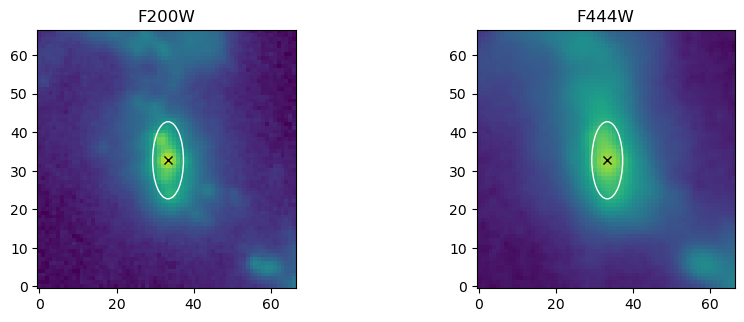

In [44]:
norm_F200W = simple_norm(data_F200W, 'log', log_a=500, min_cut=-0.001, max_cut=5)
norm_F444W = simple_norm(data_F444W, 'log', log_a=500, min_cut=-0.001, max_cut=5)

#plotting:
fig=plt.figure(figsize=(9, 5))
plt.subplots_adjust(hspace=0, wspace=0.7)
        
plt.subplot(1, 2, 1)
plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
plt.title("F200W")
plt.plot(x0_F200W, y0_F200W, color='k', marker='x')
aper_2.plot(color='white')

        
plt.subplot(1, 2, 2)
plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
plt.title("F444W")
plt.plot(x0_F200W, y0_F200W, color='k', marker='x')
aper.plot(color='white')

plt.show()

In [45]:
print(isolist_F200W.stop_code)
print(isolist_F444W.stop_code)

[0. 2. 0. 0. 0. 0. 2. 2. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 2. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 2.
 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]


Good fit.

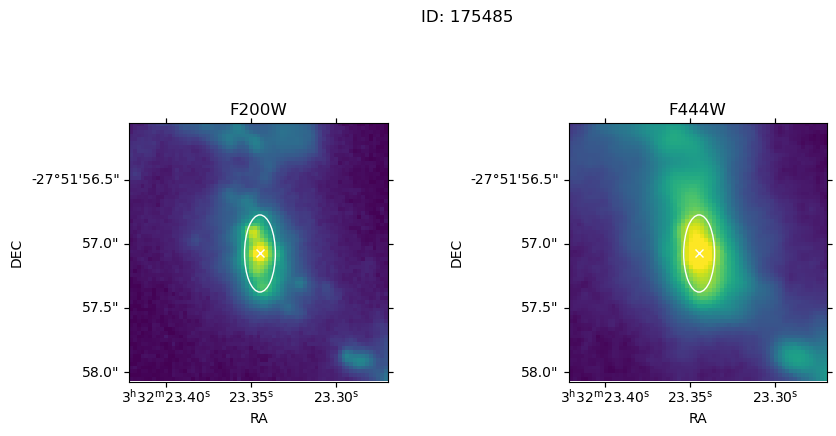

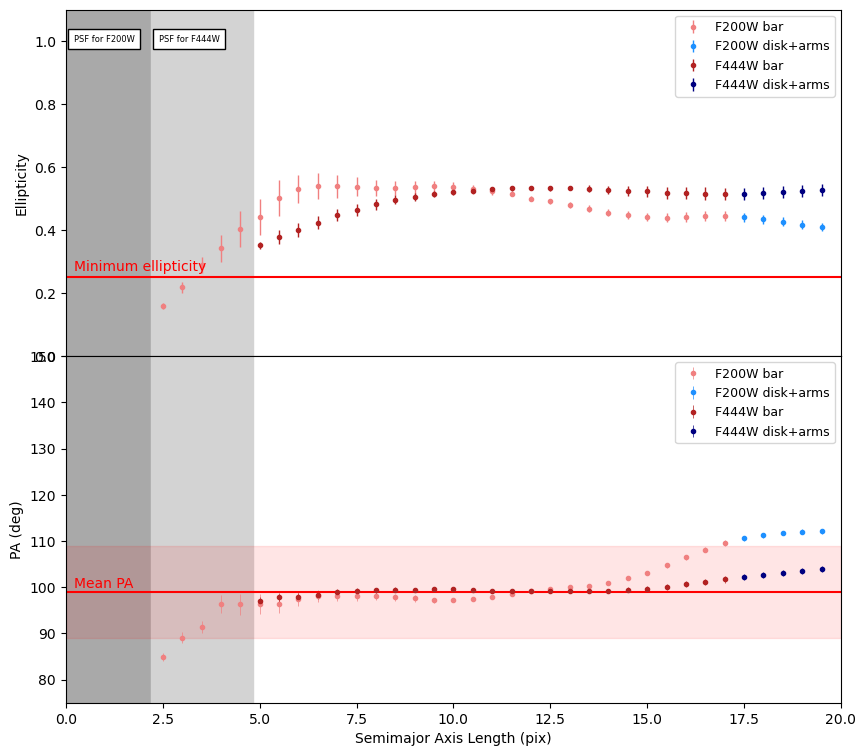

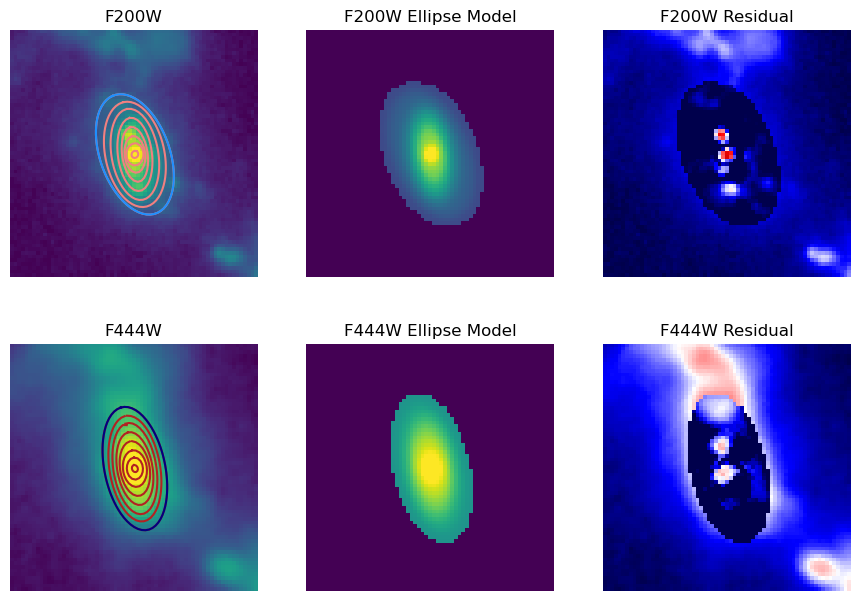

In [46]:
with PdfPages(res_dir+f'{gal}_isophotal_analysis.pdf') as pdf:

    #FIRST PAGE: Galaxy in F200W and F444W filters with initial ellipse guess to fit
        
    #Plotting the second initial ellipse guess:
        
    #normalization of both images:
    img_max_F200W=0.6*np.max(data_F200W)
    img_max_F444W=0.6*np.max(data_F444W)
    norm_F200W = simple_norm(data_F200W, 'log', log_a=70, min_cut=0, max_cut=img_max_F200W)
    norm_F444W = simple_norm(data_F444W, 'log', log_a=70, min_cut=0, max_cut=img_max_F444W)
        
    #plotting:
    fig=plt.figure(figsize=(9, 5))
    fig.suptitle(f'ID: {gal}')
    plt.subplots_adjust(hspace=0, wspace=0.7)
        
    plt.subplot(1, 2, 1, projection=coord)
    plt.imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    plt.title("F200W")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    aper_2.plot(color='white')
    plt.plot(x0_F200W, y0_F200W, color='white', marker='x')
        
    plt.subplot(1, 2, 2, projection=coord)
    plt.imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    plt.title("F444W")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    aper.plot(color='white')
    plt.plot(x0_F200W, y0_F200W, color='white', marker='x')
        
    pdf.savefig(bbox_inches="tight")

        
    #SECOND PAGE: Graphs on semimajor axis vs ellipticity and semimajor axis vs position angle
        
    plt.figure(figsize=(10, 9))
    plt.subplots_adjust(hspace=0, wspace=0.35)

    #conditions for bar and disk limits: 
    bar_F200W=(isolist_F200W.sma>minsma_F200W) & (isolist_F200W.sma<=smabreak)
    disk_F200W=isolist_F200W.sma>smabreak
    bar_F444W=(isolist_F444W.sma>minsma_F444W) & (isolist_F444W.sma<=smabreak)
    disk_F444W=isolist_F444W.sma>smabreak
        
    plt.subplot(2, 1, 1)
    plt.errorbar(isolist_F200W.sma[bar_F200W], isolist_F200W.eps[bar_F200W], 
                 yerr=isolist_F200W.ellip_err[bar_F200W], 
                 fmt='o', elinewidth=1, markersize=3, color='lightcoral', label='F200W bar')
    plt.errorbar(isolist_F200W.sma[disk_F200W], isolist_F200W.eps[disk_F200W], 
                 yerr=isolist_F200W.ellip_err[disk_F200W], 
                 fmt='o', elinewidth=1, markersize=3, color='dodgerblue', label='F200W disk+arms')
    plt.errorbar(isolist_F444W.sma[bar_F444W], isolist_F444W.eps[bar_F444W], 
                 yerr=isolist_F444W.ellip_err[bar_F444W], 
                 fmt='o', elinewidth=1, markersize=3, color='firebrick', label='F444W bar')
    plt.errorbar(isolist_F444W.sma[disk_F444W], isolist_F444W.eps[disk_F444W], 
                 yerr=isolist_F444W.ellip_err[disk_F444W], 
                 fmt='o', elinewidth=1, markersize=3, color='navy', label='F444W disk+arms')
    plt.ylabel('Ellipticity')
    plt.legend(fontsize=9)
    
    #lines and aspect of plot:
    plt.xticks([])
    plt.hlines(y=0.25, xmin=0, xmax=maxsma, colors='red')
    plt.ylim(0,1.1)
    plt.xlim(xmin=0,xmax=maxsma)
    plt.fill_betweenx(y=(0,1.1), x1=0, x2=minsma_F200W, color='darkgrey')
    plt.fill_betweenx(y=(0,1.1), x1=minsma_F200W, x2=minsma_F444W, color='lightgrey')
    plt.text(x=0.2, y=0.27, s='Minimum ellipticity', color='red')
    box_props = dict(facecolor='white', edgecolor='black')
    plt.text(x=0.2,y=1,s='PSF for F200W', bbox=box_props, fontsize=6)
    plt.text(x=minsma_F200W+0.2,y=1,s='PSF for F444W', bbox=box_props, fontsize=6)

        
    plt.subplot(2, 1, 2)
    plt.errorbar(isolist_F200W.sma[bar_F200W], isolist_F200W.pa[bar_F200W]/np.pi*180.0, 
                 yerr=isolist_F200W.pa_err[bar_F200W]/np.pi*80.0, fmt='o', color='lightcoral', 
                 elinewidth=0.5, markersize=3, label='F200W bar')
    plt.errorbar(isolist_F200W.sma[disk_F200W], isolist_F200W.pa[disk_F200W]/np.pi*180.0, 
                 yerr=isolist_F200W.pa_err[disk_F200W]/np.pi*80.0, fmt='o', color='dodgerblue', 
                 elinewidth=0.5, markersize=3, label='F200W disk+arms')
    plt.errorbar(isolist_F444W.sma[bar_F444W], isolist_F444W.pa[bar_F444W]/np.pi*180.0, 
                 yerr=isolist_F444W.pa_err[bar_F444W]/np.pi*80.0, fmt='o', color='firebrick', 
                 elinewidth=0.5, markersize=3, label='F444W bar')
    plt.errorbar(isolist_F444W.sma[disk_F444W], isolist_F444W.pa[disk_F444W]/np.pi*180.0, 
                 yerr=isolist_F444W.pa_err[disk_F444W]/np.pi*80.0, fmt='o', color='navy', elinewidth=0.5, 
                 markersize=3, label='F444W disk+arms')
    plt.xlabel('Semimajor Axis Length (pix)')
    plt.ylabel('PA (deg)')
    plt.legend(fontsize=9)

    #lines and aspect of plot:
    plt.ylim(ymin_PA,ymax_PA)
    plt.xlim(xmin=0,xmax=maxsma)
    plt.fill_betweenx(y=(ymin_PA,ymax_PA), x1=0, x2=minsma_F200W, color='darkgrey')
    plt.fill_betweenx(y=(ymin_PA,ymax_PA), x1=minsma_F200W, x2=minsma_F444W, color='lightgrey')
    ymean=np.mean(isolist_F200W.pa/np.pi*180.0)
    ymean2=np.mean(isolist_F444W.pa/np.pi*180.0)
    ymean_t=np.mean((ymean,ymean2))
    plt.text(x=0.2, y=ymean_t+1, s='Mean PA', color='red')
    plt.hlines(y=ymean_t, xmin=0, xmax=maxsma, colors='red')
    plt.fill_between(x=(0,maxsma), y1=ymean_t-10, y2=ymean_t+10, color='red', alpha=0.1)


        
    pdf.savefig(bbox_inches="tight")

        
    #THIRD PAGE: data, model and residuals

    #models and residuals:
    model_image_F200W = build_ellipse_model(data_F200W.shape, isolist_F200W)
    residual_F200W = data_F200W - model_image_F200W
    model_image_F444W = build_ellipse_model(data_F444W.shape, isolist_F444W)
    residual_F444W = data_F444W - model_image_F444W
        
    fig, axs = plt.subplots(figsize=(6, 6), nrows=2, ncols=3)
    fig.subplots_adjust(left=0.1, right=1.5, bottom=0.02, top=0.98)
        
    axs[0][0].imshow(data_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    axs[0][0].set_title('F200W')
    axs[0][0].axis('off')
        
    smas = np.linspace(0.5, smabreak, int(smabreak/2))
    for sma in smas:
        iso_F200W = isolist_F200W.get_closest(sma)
        x_F200W, y_F200W, = iso_F200W.sampled_coordinates()
        axs[0][0].plot(x_F200W, y_F200W, color='lightcoral')
    smas = np.linspace(smabreak, maxsma, int((maxsma-smabreak)/2))
    for sma in smas:
        iso_F200W = isolist_F200W.get_closest(sma)
        x_F200W, y_F200W, = iso_F200W.sampled_coordinates()
        axs[0][0].plot(x_F200W, y_F200W, color='dodgerblue')
        
    axs[0][1].imshow(model_image_F200W, origin='lower',norm=norm_F200W, cmap='viridis')
    axs[0][1].set_title('F200W Ellipse Model')
    axs[0][1].axis('off')
        
    axs[0][2].imshow(residual_F200W, origin='lower',norm=norm_F200W, cmap='seismic')
    axs[0][2].set_title('F200W Residual')
    axs[0][2].axis('off')
        
    axs[1][0].imshow(data_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    axs[1][0].set_title('F444W')
    axs[1][0].axis('off')
        
    smas = np.linspace(0.5, smabreak, int(smabreak/2))
    for sma in smas:
        iso_F444W = isolist_F444W.get_closest(sma)
        x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
        axs[1][0].plot(x_F444W, y_F444W, color='firebrick')
    smas = np.linspace(smabreak, maxsma, int((maxsma-smabreak)/2))
    for sma in smas:
        iso_F444W = isolist_F444W.get_closest(sma)
        x_F444W, y_F444W, = iso_F444W.sampled_coordinates()
        axs[1][0].plot(x_F444W, y_F444W, color='navy')
        
    axs[1][1].imshow(model_image_F444W, origin='lower',norm=norm_F444W, cmap='viridis')
    axs[1][1].set_title('F444W Ellipse Model')
    axs[1][1].axis('off')
        
    axs[1][2].imshow(residual_F444W, origin='lower',norm=norm_F444W, cmap='seismic')
    axs[1][2].set_title('F444W Residual')
    axs[1][2].axis('off')

        
    pdf.savefig(bbox_inches="tight")

# 4. Time

In [47]:
time_end = datetime.now()
print(f"Initial time...: {time_ini}")
print(f"Final time.....: {time_end}")
print(f"Excecution time: {time_end-time_ini}")

Initial time...: 2024-06-03 00:20:55.512588
Final time.....: 2024-06-03 00:29:41.488949
Excecution time: 0:08:45.976361
